<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/11%20Zee%20-%20Recommendation%20System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

110697-zee.avif

# **Business Problem & Required Outcome**

* Create a Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience
* The focus is on leveraging user ratings and similarities among users to create a
robust, personalized movie recommender system.
* Utilizing a comprehensive dataset of movie ratings, user demographics, and
movie details, Develop a system that can accurately predict user
preferences and suggest movies accordingly.
* The insights gained from this system are expected to drive user engagement,
increase satisfaction, and foster a more intuitive user experience.

# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

import re

!pip install category_encoders
from category_encoders import TargetEncoder
# !pip install sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler, MinMaxScaler

from scipy.stats import pearsonr

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.neighbors import NearestNeighbors

!pip install cmfrec
from cmfrec import CMF

from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape)

from sklearn.model_selection import train_test_split

from sklearn.manifold import TSNE
!pip install umap-learn
!pip install umap-learn[plot]
import umap
import umap.plot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.4/268.4 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached findblas-0.1.23-py3-none-any.whl
  Created wheel for cmfrec: filename=cmfrec-3.5.1.post8-cp310-cp310-linux_x86_64.whl size=5830755 sha256=1405a35a3060d92242538e924a6241df830433cabb821cbcc4a5162063084e68
  Stored in directory: /root/.cache/pip/wheels/e0/71/0d/01436e6fcdeded3e169a45fcd8364ffe4991cc4deabf30b37d
Successfully built cmfrec
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=10bf1b67c7ba612536f69366dfb568924aa3244240eb28a79a6e3c1327

# **Loading Data & Checking Structures**

In [ ]:
#!pip install gdown

In [ ]:
!gdown 15QeQgmjoeBxRDEOFPSrMr8eIvwk6QgUQ

Downloading...
From: https://drive.google.com/uc?id=15QeQgmjoeBxRDEOFPSrMr8eIvwk6QgUQ
To: /content/zee-movies.dat
100% 171k/171k [00:00<00:00, 90.5MB/s]


In [ ]:
!gdown 1XJpSzv-UMeSmCCOdyZviRF4XCxiKJUrk

Downloading...
From: https://drive.google.com/uc?id=1XJpSzv-UMeSmCCOdyZviRF4XCxiKJUrk
To: /content/zee-ratings.dat
100% 24.6M/24.6M [00:00<00:00, 125MB/s] 


In [ ]:
!gdown 1-xsSNizet0ruiMgKLWRcmme8L_iDejhc

Downloading...
From: https://drive.google.com/uc?id=1-xsSNizet0ruiMgKLWRcmme8L_iDejhc
To: /content/zee-users.dat
100% 134k/134k [00:00<00:00, 73.3MB/s]


In [ ]:
movies=pd.read_fwf("zee-movies.dat",encoding='ISO-8859-1')

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Movie ID::Title::Genres  3883 non-null   object
 1   Unnamed: 1               100 non-null    object
 2   Unnamed: 2               51 non-null     object
dtypes: object(3)
memory usage: 91.1+ KB


In [ ]:
movies.shape

(3883, 3)

In [ ]:
movies.head(5)

,Movie ID::Title::Genres,Unnamed: 1,Unnamed: 2
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN
2,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN
3,4::Waiting to Exhale (1995)::Comedy|Drama,NaN,NaN
4,5::Father of the Bride Part II (1995)::Comedy,NaN,NaN


In [ ]:
ratings=pd.read_fwf("zee-ratings.dat",encoding='ISO-8859-1')

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 1 columns):
 #   Column                              Non-Null Count    Dtype 
---  ------                              --------------    ----- 
 0   UserID::MovieID::Rating::Timestamp  1000209 non-null  object
dtypes: object(1)
memory usage: 7.6+ MB


In [ ]:
ratings.shape

(1000209, 1)

In [ ]:
ratings.head(5)

,UserID::MovieID::Rating::Timestamp
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291


In [ ]:
users=pd.read_fwf("zee-users.dat",encoding='ISO-8859-1')

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   UserID::Gender::Age::Occupation::Zip-code  6040 non-null   object
dtypes: object(1)
memory usage: 47.3+ KB


In [ ]:
users.shape

(6040, 1)

In [ ]:
users.head(5)

,UserID::Gender::Age::Occupation::Zip-code
0,1::F::1::10::48067
1,2::M::56::16::70072
2,3::M::25::15::55117
3,4::M::45::7::02460
4,5::M::25::20::55455


# **Extracting Features from each Dataset**

## Movies

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Movie ID::Title::Genres  3883 non-null   object
 1   Unnamed: 1               100 non-null    object
 2   Unnamed: 2               51 non-null     object
dtypes: object(3)
memory usage: 91.1+ KB


Let drop the Columns with Incompletely Filled Data

In [ ]:
a= movies["Unnamed: 1"].isnull() & movies["Unnamed: 2"].isnull()
a.sum()

3783

In [ ]:
movies = movies[movies["Unnamed: 1"].isnull() & movies["Unnamed: 2"].isnull()]

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3783 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Movie ID::Title::Genres  3783 non-null   object
 1   Unnamed: 1               0 non-null      object
 2   Unnamed: 2               0 non-null      object
dtypes: object(3)
memory usage: 118.2+ KB


In [ ]:
movies.drop(columns = ["Unnamed: 1","Unnamed: 2"], inplace=True)

In [ ]:
movies.shape

(3783, 1)

In [ ]:
movies.head(5)

,Movie ID::Title::Genres
0,1::Toy Story (1995)::Animation|Children's|Comedy
1,2::Jumanji (1995)::Adventure|Children's|Fantasy
2,3::Grumpier Old Men (1995)::Comedy|Romance
3,4::Waiting to Exhale (1995)::Comedy|Drama
4,5::Father of the Bride Part II (1995)::Comedy


* Lets Extract Features

In [ ]:
movies.shape

(3783, 1)

In [ ]:
movies["Movie ID"] = movies["Movie ID::Title::Genres"].str.split("::").transform(lambda x : x[0])
movies["Title"] = movies["Movie ID::Title::Genres"].str.split("::").transform(lambda x : x[1])
movies["Genres"] = movies["Movie ID::Title::Genres"].str.split("::").transform(lambda x : x[-1])

In [ ]:
movies.head()

,Movie ID::Title::Genres,Movie ID,Title,Genres
0,1::Toy Story (1995)::Animation|Children's|Comedy,1,Toy Story (1995),Animation|Children's|Comedy
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3::Grumpier Old Men (1995)::Comedy|Romance,3,Grumpier Old Men (1995),Comedy|Romance
3,4::Waiting to Exhale (1995)::Comedy|Drama,4,Waiting to Exhale (1995),Comedy|Drama
4,5::Father of the Bride Part II (1995)::Comedy,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies["Genressplit"] = movies["Genres"].str.split("|")

In [ ]:
movies = movies.explode("Genressplit")

In [ ]:
movies.drop(columns= ["Movie ID::Title::Genres"], inplace = True)

In [ ]:
movies.head()

,Movie ID,Title,Genres,Genressplit
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation
0,1,Toy Story (1995),Animation|Children's|Comedy,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Children's


 * Lets Extract Release Year Features also

In [ ]:
movies["Releaseyear"] = movies["Title"].str.split("(").transform(lambda x : x[-1])
movies["Title"] = movies["Title"].str.split("(").transform(lambda x : x[0])

In [ ]:
movies["Releaseyear"] = movies["Releaseyear"].str.split(")").transform(lambda x : x[0])

In [ ]:
movies["Releaseyear"].value_counts()

1998    556
1996    527
1997    526
1995    525
1999    417
       ... 
1923      3
1919      3
1922      2
1920      2
1921      1
Name: Releaseyear, Length: 81, dtype: int64

In [ ]:
movies["Genres"]=movies["Genres"].astype("category")
movies["Releaseyear"]=movies["Releaseyear"].astype("int")

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6174 entries, 0 to 3882
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Movie ID     6174 non-null   object  
 1   Title        6174 non-null   object  
 2   Genres       6174 non-null   category
 3   Genressplit  6174 non-null   object  
 4   Releaseyear  6174 non-null   int64   
dtypes: category(1), int64(1), object(3)
memory usage: 263.6+ KB


In [ ]:
movies.head()

,Movie ID,Title,Genres,Genressplit,Releaseyear
0,1,Toy Story,Animation|Children's|Comedy,Animation,1995
0,1,Toy Story,Animation|Children's|Comedy,Children's,1995
0,1,Toy Story,Animation|Children's|Comedy,Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,Adventure,1995
1,2,Jumanji,Adventure|Children's|Fantasy,Children's,1995


## Users

In [ ]:
users.head()

,UserID::Gender::Age::Occupation::Zip-code
0,1::F::1::10::48067
1,2::M::56::16::70072
2,3::M::25::15::55117
3,4::M::45::7::02460
4,5::M::25::20::55455


In [ ]:
users["USerID"] = users["UserID::Gender::Age::Occupation::Zip-code"].str.split("::").transform(lambda x : x[0])
users["Gender"] = users["UserID::Gender::Age::Occupation::Zip-code"].str.split("::").transform(lambda x : x[1])
users["Age"] = users["UserID::Gender::Age::Occupation::Zip-code"].str.split("::").transform(lambda x : x[2])
users["Occupation"] = users["UserID::Gender::Age::Occupation::Zip-code"].str.split("::").transform(lambda x : x[3])
users["Zipcode"] = users["UserID::Gender::Age::Occupation::Zip-code"].str.split("::").transform(lambda x : x[4])

In [ ]:
users.drop(columns= ["UserID::Gender::Age::Occupation::Zip-code"], inplace = True)

In [ ]:
users["Gender"]=users["Gender"].astype("category")
users["Occupation"]=users["Occupation"].astype("category")
users["Age"]=users["Age"].astype("category")
users["Zipcode"]=users["Zipcode"].astype("category")

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   USerID      6040 non-null   object  
 1   Gender      6040 non-null   category
 2   Age         6040 non-null   category
 3   Occupation  6040 non-null   category
 4   Zipcode     6040 non-null   category
dtypes: category(4), object(1)
memory usage: 233.9+ KB


In [ ]:
users.head()

,USerID,Gender,Age,Occupation,Zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


## Ratings

In [ ]:
ratings.head(5)

,UserID::MovieID::Rating::Timestamp
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291


In [ ]:
ratings["USerID"] = ratings["UserID::MovieID::Rating::Timestamp"].str.split("::").transform(lambda x : x[0])
ratings["Movie ID"] = ratings["UserID::MovieID::Rating::Timestamp"].str.split("::").transform(lambda x : x[1])
ratings["Rating"] = ratings["UserID::MovieID::Rating::Timestamp"].str.split("::").transform(lambda x : x[2])
ratings["Timestamp"] = ratings["UserID::MovieID::Rating::Timestamp"].str.split("::").transform(lambda x : x[3])

In [ ]:
ratings.drop(columns= ["UserID::MovieID::Rating::Timestamp"], inplace = True)

In [ ]:
ratings["Rating"]=ratings["Rating"].astype("int")
ratings["Timestamp"]=ratings["Timestamp"].astype("int")

In [ ]:
ratings['hour'] = ratings['Timestamp'].apply(lambda x: datetime.fromtimestamp(x).hour)

In [ ]:
ratings['dayofweek'] = ratings['Timestamp'].apply(lambda x: datetime.fromtimestamp(x).weekday())

In [ ]:
ratings['month'] = ratings['Timestamp'].apply(lambda x: datetime.fromtimestamp(x).month)
ratings['year'] = ratings['Timestamp'].apply(lambda x: datetime.fromtimestamp(x).year)

In [ ]:
ratings['day'] = ratings['Timestamp'].apply(lambda x: datetime.fromtimestamp(x).day)

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   USerID     1000209 non-null  object
 1   Movie ID   1000209 non-null  object
 2   Rating     1000209 non-null  int64 
 3   Timestamp  1000209 non-null  int64 
 4   hour       1000209 non-null  int64 
 5   dayofweek  1000209 non-null  int64 
 6   month      1000209 non-null  int64 
 7   year       1000209 non-null  int64 
 8   day        1000209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 68.7+ MB


In [ ]:
ratings.head()

,USerID,Movie ID,Rating,Timestamp,hour,dayofweek,month,year,day
0,1,1193,5,978300760,22,6,12,2000,31
1,1,661,3,978302109,22,6,12,2000,31
2,1,914,3,978301968,22,6,12,2000,31
3,1,3408,4,978300275,22,6,12,2000,31
4,1,2355,5,978824291,23,5,1,2001,6


# **Exploratory Data Analysis**

## Movies

In [ ]:
movies.head()

,Movie ID,Title,Genres,Genressplit,Releaseyear
0,1,Toy Story,Animation|Children's|Comedy,Animation,1995
0,1,Toy Story,Animation|Children's|Comedy,Children's,1995
0,1,Toy Story,Animation|Children's|Comedy,Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,Adventure,1995
1,2,Jumanji,Adventure|Children's|Fantasy,Children's,1995


In [ ]:
for i in movies.columns:
  print("No of Unique {} are {}".format(i,movies[i].nunique()))

No of Unique Movie ID are 3783
No of Unique Title are 3733
No of Unique Genres are 296
No of Unique Genressplit are 25
No of Unique Releaseyear are 81


In [ ]:
movies["Genressplit"].value_counts().reset_index()

,index,Genressplit
0,Drama,1568
1,Comedy,1170
2,Action,485
3,Thriller,484
4,Romance,452
5,Horror,332
6,Adventure,257
7,Sci-Fi,255
8,Children's,227
9,Crime,208


* Some of the Genres are not completely spelled, we will correct them so that they do no behave as separate Genre

In [ ]:
movies.loc[movies["Genressplit"] =="Horro","Genressplit"] = "Horror"
movies.loc[movies["Genressplit"] =="Fantas","Genressplit"] = "Fantasy"
movies.loc[movies["Genressplit"] =="Dram","Genressplit"] = "Drama"
movies.loc[movies["Genressplit"] =="Wester","Genressplit"] = "Western"
movies.loc[movies["Genressplit"] =="Sci-F","Genressplit"] = "Sci-Fi"
movies.loc[movies["Genressplit"] =="Thrille","Genressplit"] = "Thriller"
movies.loc[movies["Genressplit"] =="Wa","Genressplit"] = "War"

In [ ]:
movies["Genressplit"].nunique()

18

<Axes: xlabel='Genressplit', ylabel='count'>

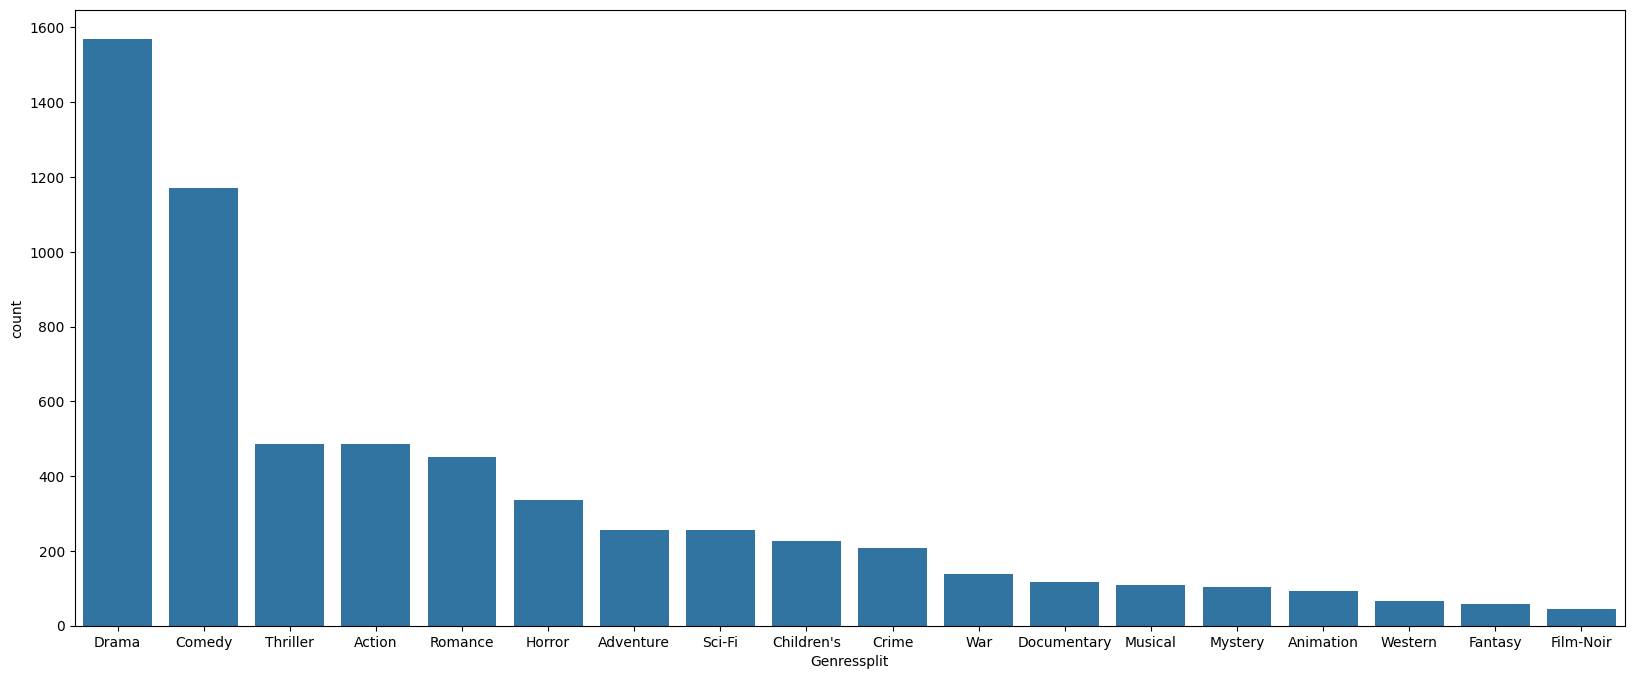

In [ ]:
plt.figure(figsize =(20,8))
sns.countplot(data= movies, x="Genressplit", order = movies["Genressplit"].value_counts().reset_index()["index"])

* There is content avaiable in 18 Genres
* Most of the Movies  are in the Genres
1. Drama
2. Comedy
3. Thriller & Action


In [ ]:
movies.Releaseyear.describe()

count    6174.000000
mean     1986.229997
std        16.547598
min      1919.000000
25%      1983.000000
50%      1994.000000
75%      1997.000000
max      2000.000000
Name: Releaseyear, dtype: float64

<Axes: xlabel='Releaseyear', ylabel='Count'>

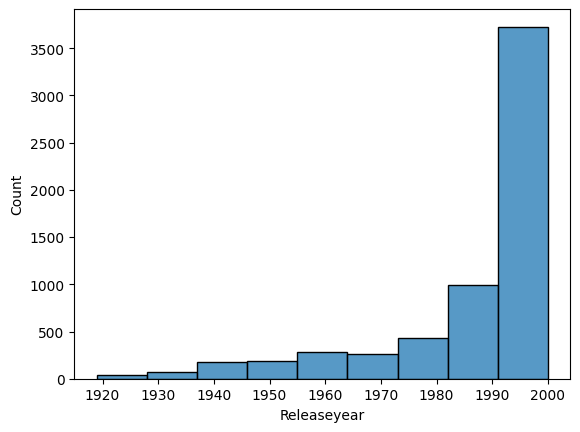

In [ ]:
sns.histplot(data=movies, x= "Releaseyear", bins =9)

* More than 75% of the movies have release year after 1983

* lets Convert Release year into bins as Release year recency factor

In [ ]:
bins = [1919,1940,1960,1980,1990,2000]
movies["Releaseyeargroups"] = pd.cut(movies["Releaseyear"], bins, labels=[1,2,3,4,5])

<Axes: xlabel='count', ylabel='Releaseyeargroups'>

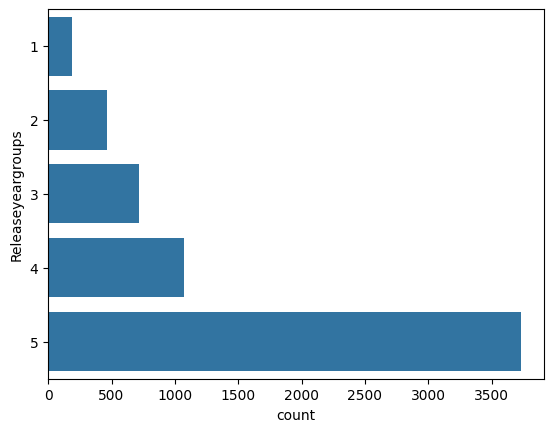

In [ ]:
sns.countplot( movies["Releaseyeargroups"])

In [ ]:
for i in movies.columns:
  print("No of Unique {} are {}".format(i,movies[i].nunique()))

No of Unique Movie ID are 3783
No of Unique Title are 3733
No of Unique Genres are 296
No of Unique Genressplit are 18
No of Unique Releaseyear are 81
No of Unique Releaseyeargroups are 5


## Users

In [ ]:
for i in users.columns:
  print("No of Unique {} are {}".format(i,users[i].nunique()))

No of Unique USerID are 6040
No of Unique Gender are 2
No of Unique Age are 7
No of Unique Occupation are 21
No of Unique Zipcode are 3439


In [ ]:
users.shape

(6040, 5)

In [ ]:
users.head()

,USerID,Gender,Age,Occupation,Zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
Occup = {0: "other",
1: "academic/educator",
2: "artist",
3: "clerical/admin",
4: "college/grad student",
5: "customer service",
6: "doctor/health care",
7: "executive/managerial",
8: "farmer",
9: "homemaker",
10: "K-12 student",
11: "lawyer",
12: "programmer",
13: "retired",
14: "sales/marketing",
15: "scientist",
16: "self-employed",
17: "technician/engineer",
18: "tradesman/craftsman",
19: "unemployed",
20: "writer"}

In [ ]:
users["Occupation"].value_counts()

4     759
0     711
7     679
1     528
17    502
12    388
14    302
20    281
2     267
16    241
6     236
10    195
3     173
15    144
13    142
11    129
5     112
9      92
19     72
18     70
8      17
Name: Occupation, dtype: int64

* Majority of the Users occupation
1. college/grad student
2. executive/managerial
3. academic/educator

* Minimum no of users are from below Occupations
1. Farmers
2. tradesman/craftsman
3. homemakers

<Axes: xlabel='index', ylabel='Occupation'>

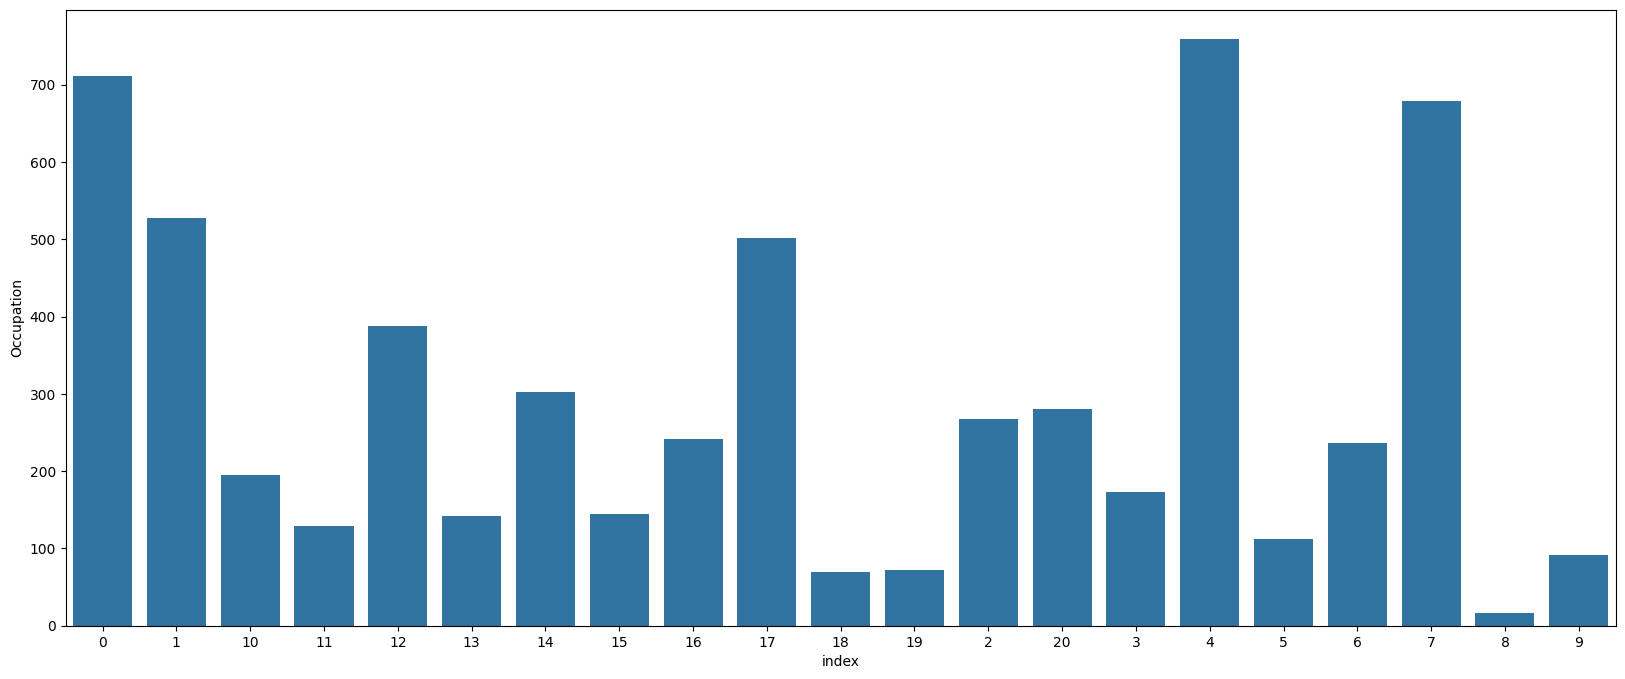

In [ ]:
plt.figure(figsize =(20,8))
sns.barplot(data= users["Occupation"].value_counts().reset_index(), x= "index", y="Occupation")

In [ ]:
users["Age"].value_counts()

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: Age, dtype: int64

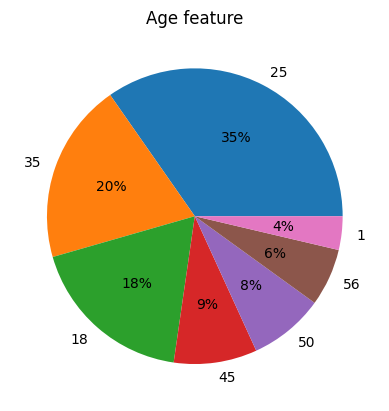

In [ ]:
plt.pie(x = users["Age"].value_counts().reset_index()["Age"],
        labels = users["Age"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("Age feature")
plt.show()

* 35% of the users are in the Age group "25 ~ 34"
* 20% of the users are in the Age group "35 ~ 44"
* only 4 % of the users are from age group "1~17"
* only 6% fo the users are from group >56

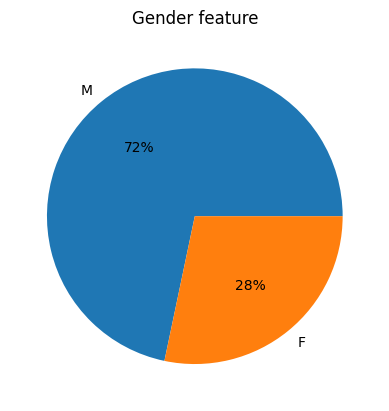

In [ ]:
plt.pie(x = users["Gender"].value_counts().reset_index()["Gender"],
        labels = users["Gender"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("Gender feature")
plt.show()

* 72% users are Male Gender only 28% are Female Gender

In [ ]:
users["Zipcode"].value_counts().head(5)

48104    19
22903    18
94110    17
55104    17
10025    16
Name: Zipcode, dtype: int64

In [ ]:
users["Zipcode"].value_counts().tail(5)

37843    1
37877    1
37909    1
37914    1
99945    1
Name: Zipcode, dtype: int64

## Ratings

In [ ]:
ratings.head()

,USerID,Movie ID,Rating,Timestamp,hour,dayofweek,month,year,day
0,1,1193,5,978300760,22,6,12,2000,31
1,1,661,3,978302109,22,6,12,2000,31
2,1,914,3,978301968,22,6,12,2000,31
3,1,3408,4,978300275,22,6,12,2000,31
4,1,2355,5,978824291,23,5,1,2001,6


In [ ]:
for i in ratings.columns:
  print("No of Unique {} are {}".format(i,ratings[i].nunique()))

No of Unique USerID are 6040
No of Unique Movie ID are 3706
No of Unique Rating are 5
No of Unique Timestamp are 458455
No of Unique hour are 24
No of Unique dayofweek are 7
No of Unique month are 12
No of Unique year are 4
No of Unique day are 31


* Out of all 3783 Movies, Rating are avaiable for only 3706

In [ ]:
ratings.shape

(1000209, 9)

In [ ]:
ratings["Rating"].value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: Rating, dtype: int64

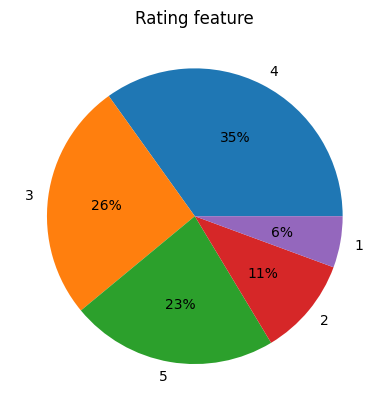

In [ ]:
plt.pie(x = ratings["Rating"].value_counts().reset_index()["Rating"],
        labels = ratings["Rating"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("Rating feature")
plt.show()

* 35% of the ratings are given as 4
* only 23% of ratings are given as 5

<Axes: xlabel='hour', ylabel='count'>

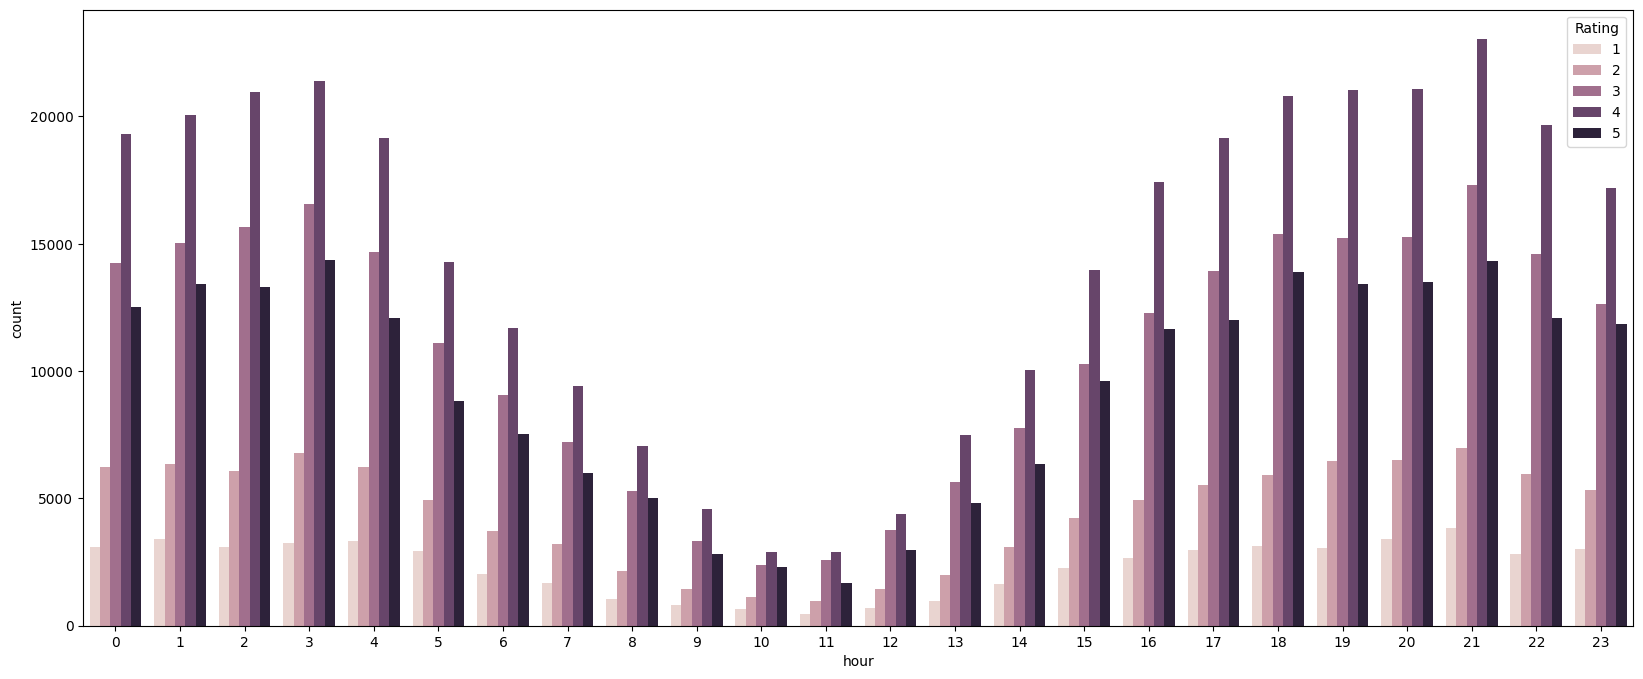

In [ ]:
plt.figure(figsize =(20,8))
sns.countplot(data= ratings, x= "hour",hue = "Rating")

* Most of the movies are rated/watched in the Night and midnight
* Movies are least watched in morning and noon time

<Axes: xlabel='dayofweek', ylabel='count'>

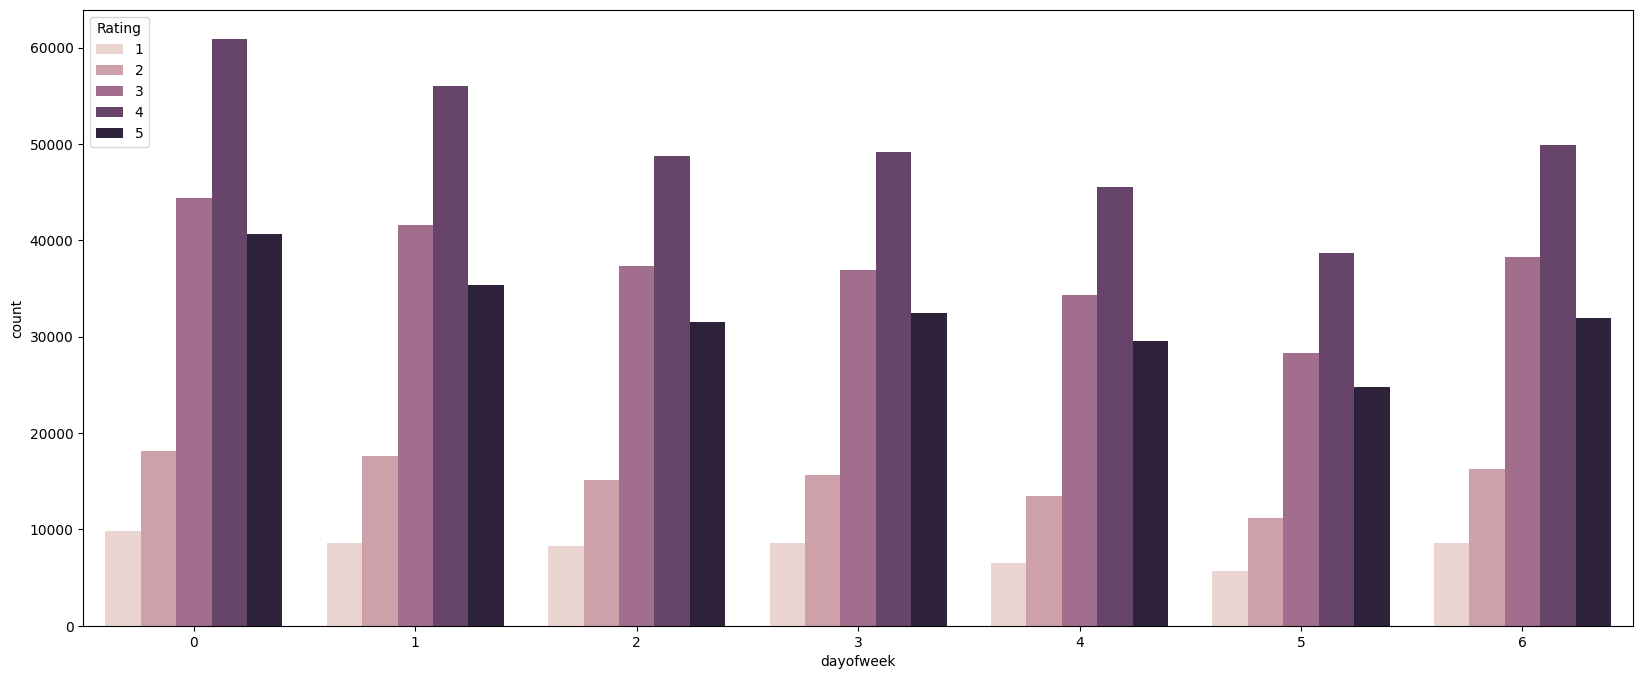

In [ ]:
plt.figure(figsize =(20,8))
sns.countplot(data= ratings, x= "dayofweek",hue = "Rating")

* Comparitively movies are mostly watched in Saturdays and Sunday
* Least rated/watched on Fridays

<Axes: xlabel='month', ylabel='count'>

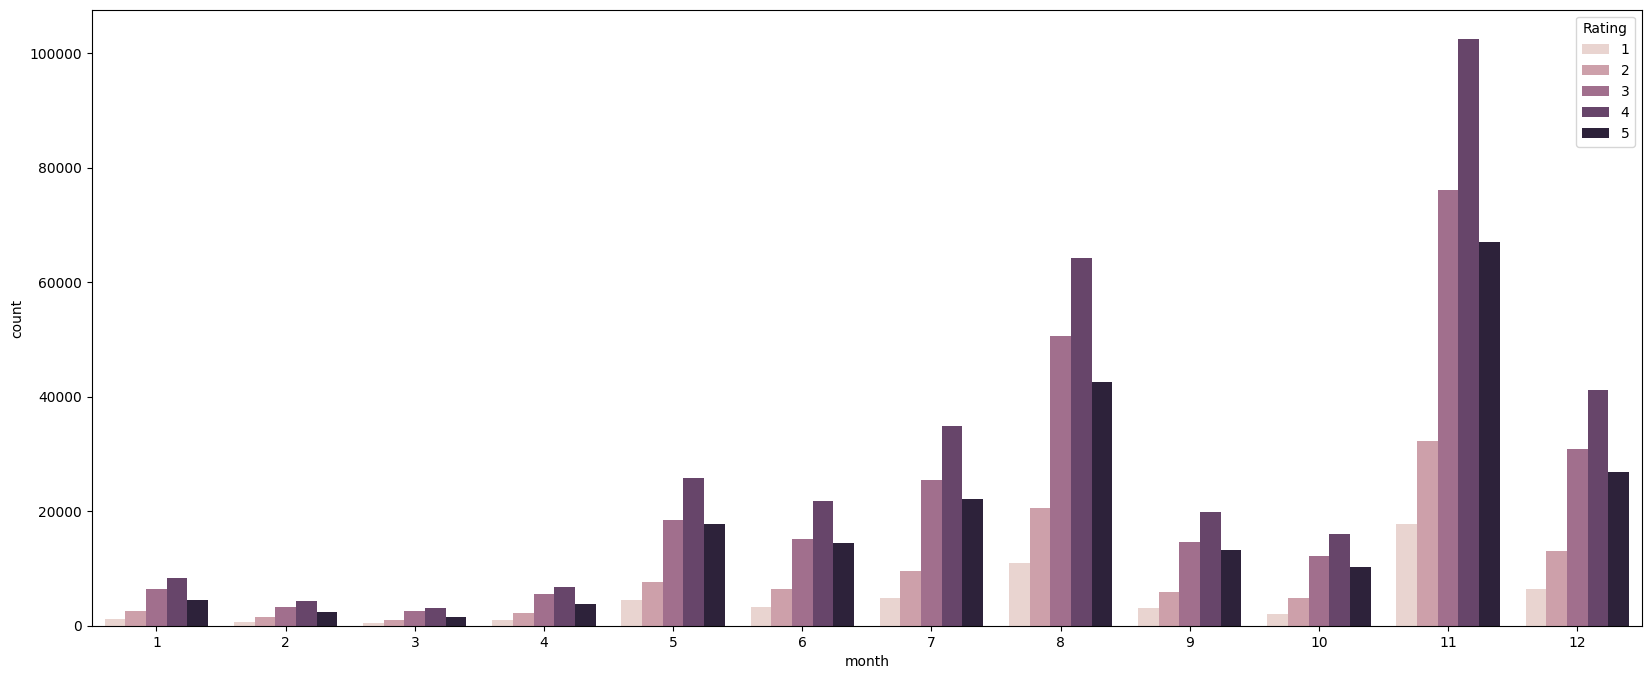

In [ ]:
plt.figure(figsize =(20,8))
sns.countplot(data= ratings, x= "month",hue = "Rating")

* Most movies are watched /rated in the month of November & next in August
* leastly watchd /rated in the month of March

<Axes: xlabel='year', ylabel='count'>

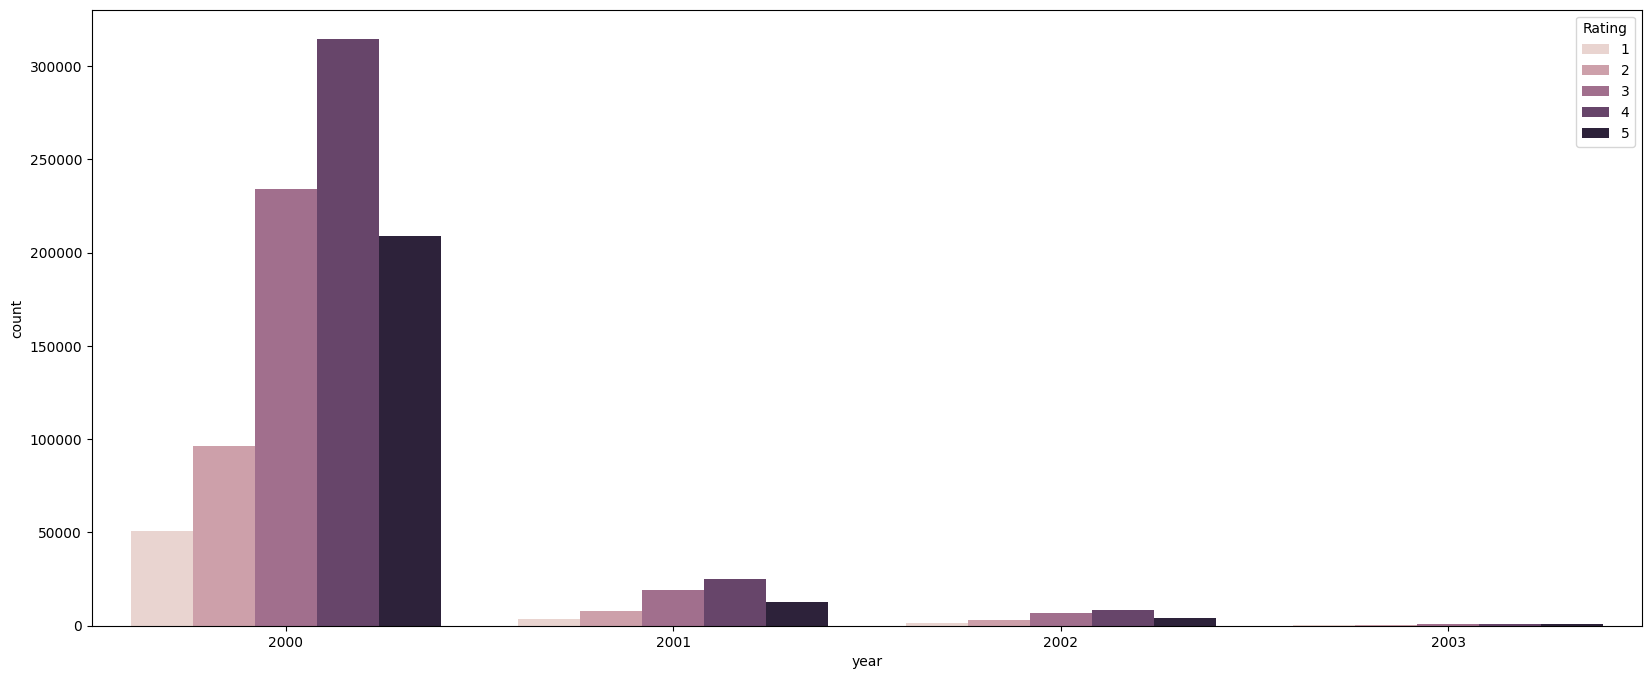

In [ ]:
plt.figure(figsize =(20,8))
sns.countplot(data= ratings, x= "year",hue = "Rating")

In [ ]:
ratings.columns

Index(['USerID', 'Movie ID', 'Rating', 'Timestamp', 'hour', 'dayofweek',
       'month', 'year', 'day'],
      dtype='object')

# **Creating Matrices for Recommendation Systems**

## Combination 3 Data frames

In [ ]:
movies.columns

Index(['Movie ID', 'Title', 'Genres', 'Genressplit', 'Releaseyear',
       'Releaseyeargroups'],
      dtype='object')

In [ ]:
data = ratings.merge(users[["USerID","Gender","Age","Occupation"]],on = "USerID", how = "right")

In [ ]:
data = data.merge(movies[["Movie ID","Title","Genres","Releaseyeargroups","Releaseyear"]],on = "Movie ID", how = 'right')

In [ ]:
data.shape

(1978767, 16)

In [ ]:
data.head(10)

,USerID,Movie ID,Rating,Timestamp,hour,dayofweek,month,year,day,Gender,Age,Occupation,Title,Genres,Releaseyeargroups,Releaseyear
0,1,1,5.0,978824268.0,23.0,5.0,1.0,2001.0,6.0,F,1,10,Toy Story,Animation|Children's|Comedy,5,1995
1,6,1,4.0,978237008.0,4.0,6.0,12.0,2000.0,31.0,F,50,9,Toy Story,Animation|Children's|Comedy,5,1995
2,8,1,4.0,978233496.0,3.0,6.0,12.0,2000.0,31.0,M,25,12,Toy Story,Animation|Children's|Comedy,5,1995
3,9,1,5.0,978225952.0,1.0,6.0,12.0,2000.0,31.0,M,25,17,Toy Story,Animation|Children's|Comedy,5,1995
4,10,1,5.0,978226474.0,1.0,6.0,12.0,2000.0,31.0,F,35,1,Toy Story,Animation|Children's|Comedy,5,1995
5,18,1,4.0,978154768.0,5.0,5.0,12.0,2000.0,30.0,F,18,3,Toy Story,Animation|Children's|Comedy,5,1995
6,19,1,5.0,978555994.0,21.0,2.0,1.0,2001.0,3.0,M,1,10,Toy Story,Animation|Children's|Comedy,5,1995
7,21,1,3.0,978139347.0,1.0,5.0,12.0,2000.0,30.0,M,18,16,Toy Story,Animation|Children's|Comedy,5,1995
8,23,1,4.0,978463614.0,19.0,1.0,1.0,2001.0,2.0,M,35,0,Toy Story,Animation|Children's|Comedy,5,1995
9,26,1,3.0,978130703.0,22.0,4.0,12.0,2000.0,29.0,M,25,7,Toy Story,Animation|Children's|Comedy,5,1995


In [ ]:
data[data["Title"] == "Liar Liar (1997)"]

,USerID,Movie ID,Rating,Timestamp,hour,dayofweek,month,year,day,Gender,Age,Occupation,Title,Genres,Releaseyeargroups,Releaseyear


* Now we have all the required information in one Dataframe, from this Dataframe we can extract information for User-User and Item-Item Based Recommendation Approach

In [ ]:
data1 = ratings.merge(users[["USerID","Gender","Age","Occupation"]],on = "USerID", how = "right")
data1 = data1.merge(movies[["Movie ID","Genres","Genressplit","Releaseyeargroups","Releaseyear"]],on = "Movie ID", how = 'right')

In [ ]:
data1.columns

Index(['USerID', 'Movie ID', 'Rating', 'Timestamp', 'hour', 'dayofweek',
       'month', 'year', 'day', 'Gender', 'Age', 'Occupation', 'Genres',
       'Genressplit', 'Releaseyeargroups', 'Releaseyear'],
      dtype='object')

### EDA on Combined DataFrame

<Axes: xlabel='Rating', ylabel='Gender'>

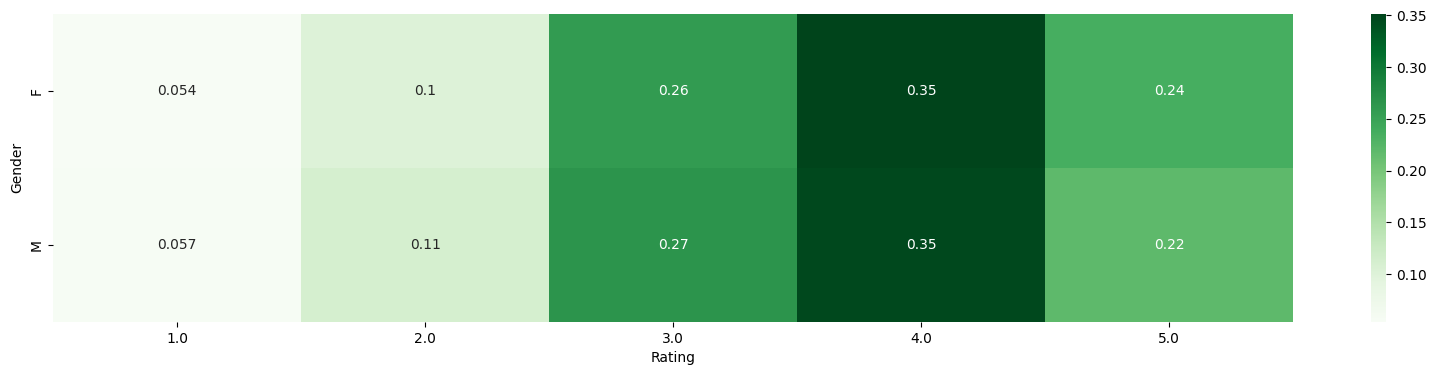

In [ ]:
plt.figure(figsize = (20,4))
sns.heatmap(pd.crosstab(data["Gender"], data["Rating"], normalize = "index"),annot=True,cmap = "Greens")

* Gender has no Bias in Rating Viewpoint for Movies

<Axes: xlabel='Rating', ylabel='Age'>

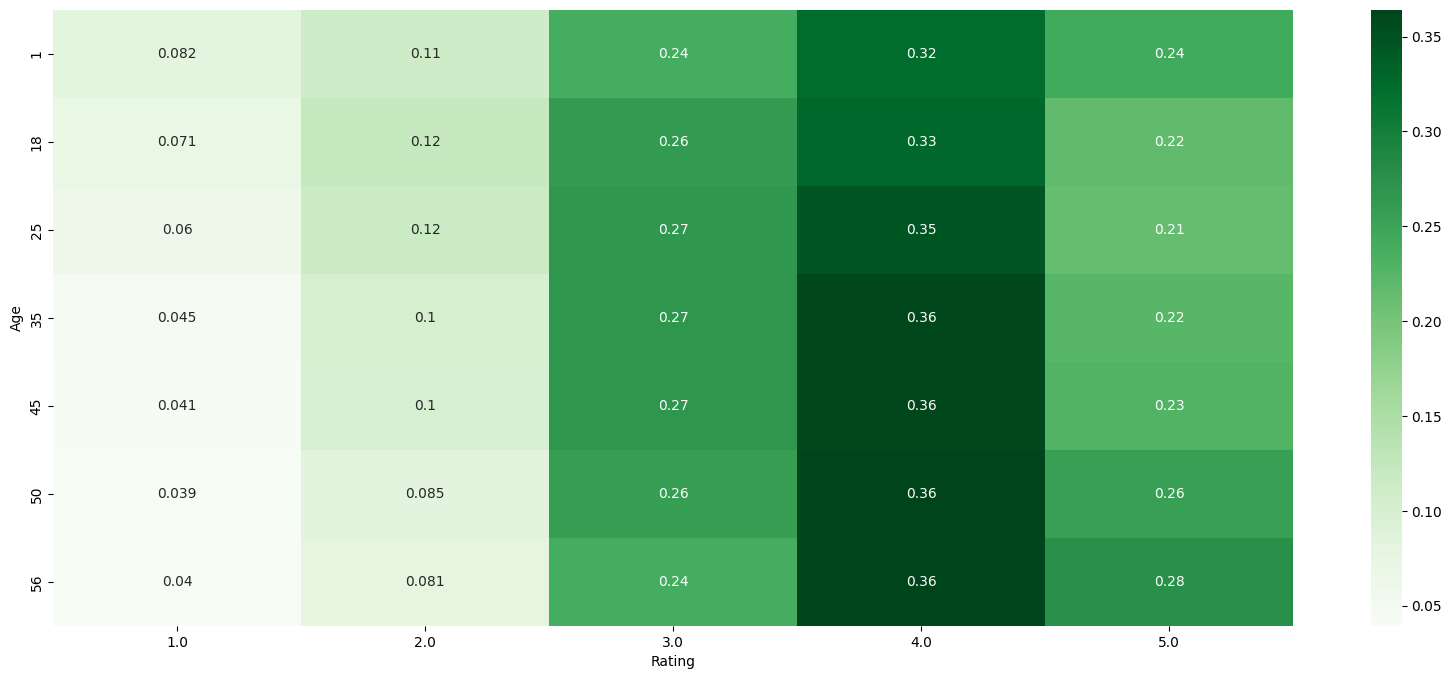

In [ ]:
plt.figure(figsize = (20,8))
sns.heatmap(data=pd.crosstab(data["Age"], data["Rating"], normalize = "index"),annot=True,cmap = "Greens")

* Age Groups 18 ~ 25, 25 ~ 34, 35 ~ 44, 45 ~ 49 are comparively critical in rating movies in caomparison with other age groups

<Axes: xlabel='Genressplit', ylabel='Age'>

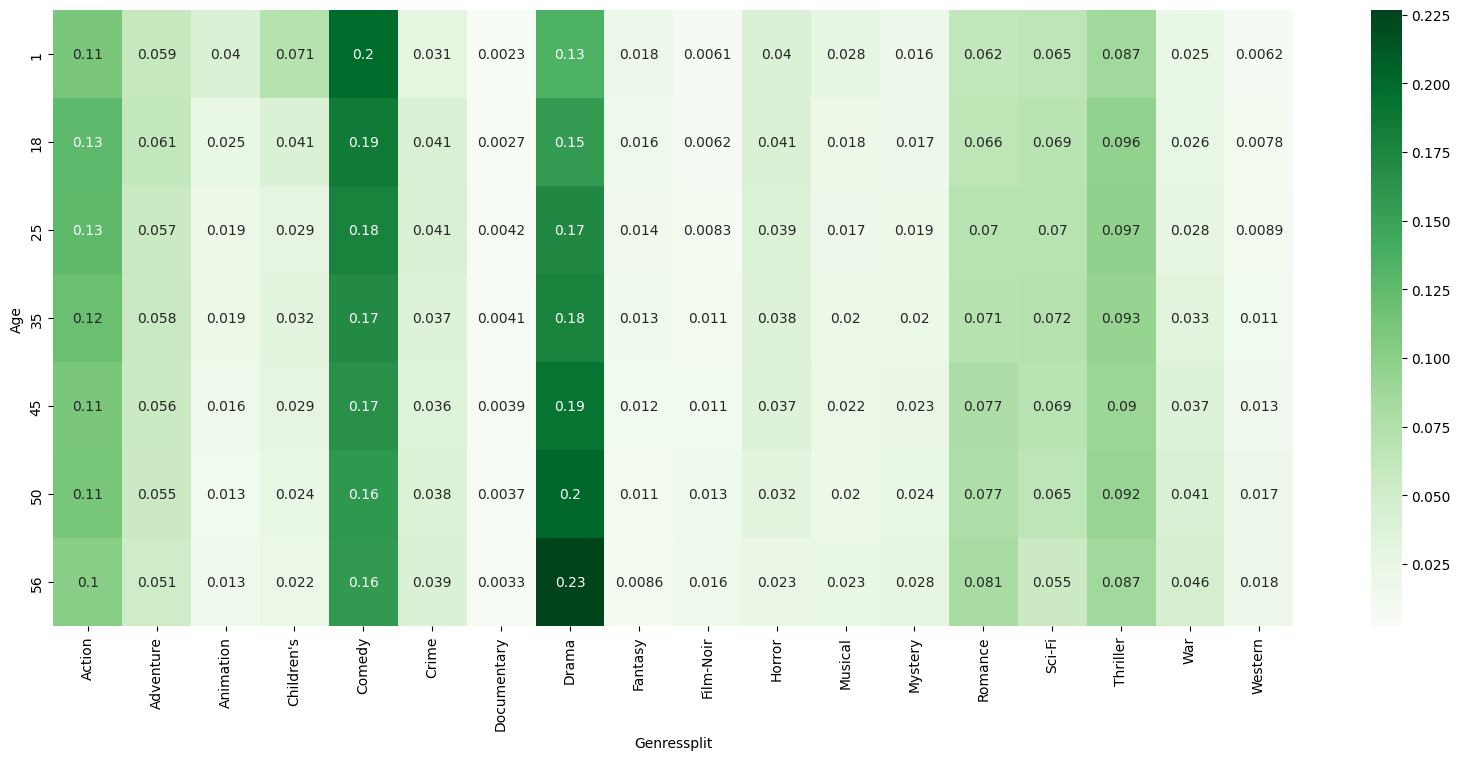

In [ ]:
plt.figure(figsize = (20,8))
sns.heatmap(data=pd.crosstab(data1["Age"], data1["Genressplit"], normalize = "index"),annot=True,cmap = "Greens")

* All Age groups have almost preference order for Genres : Drama--> Comedy --> Action --> Thriller

<Axes: xlabel='Genressplit', ylabel='Gender'>

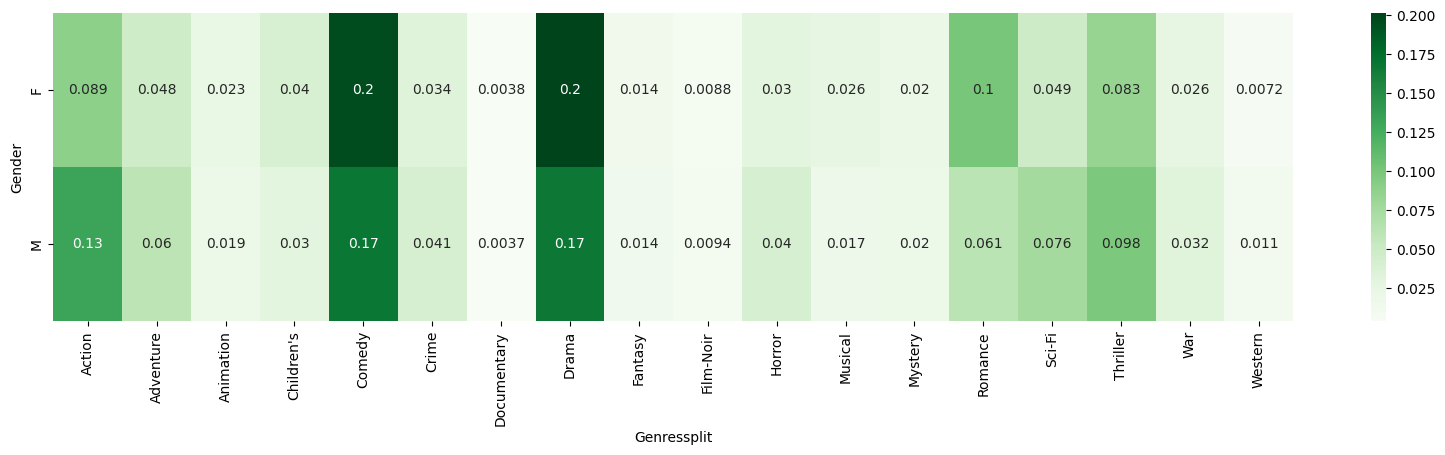

In [ ]:
plt.figure(figsize = (20,4))
sns.heatmap(data=pd.crosstab(data1["Gender"], data1["Genressplit"], normalize = "index"),annot=True,cmap = "Greens")

* Female has more preference in Genres - Romance,Comedy,Drama in Comparison with Male
* Male has more preference in Genres - Action,Mystery in comparsion with Female

<Axes: xlabel='Genressplit', ylabel='Occupation'>

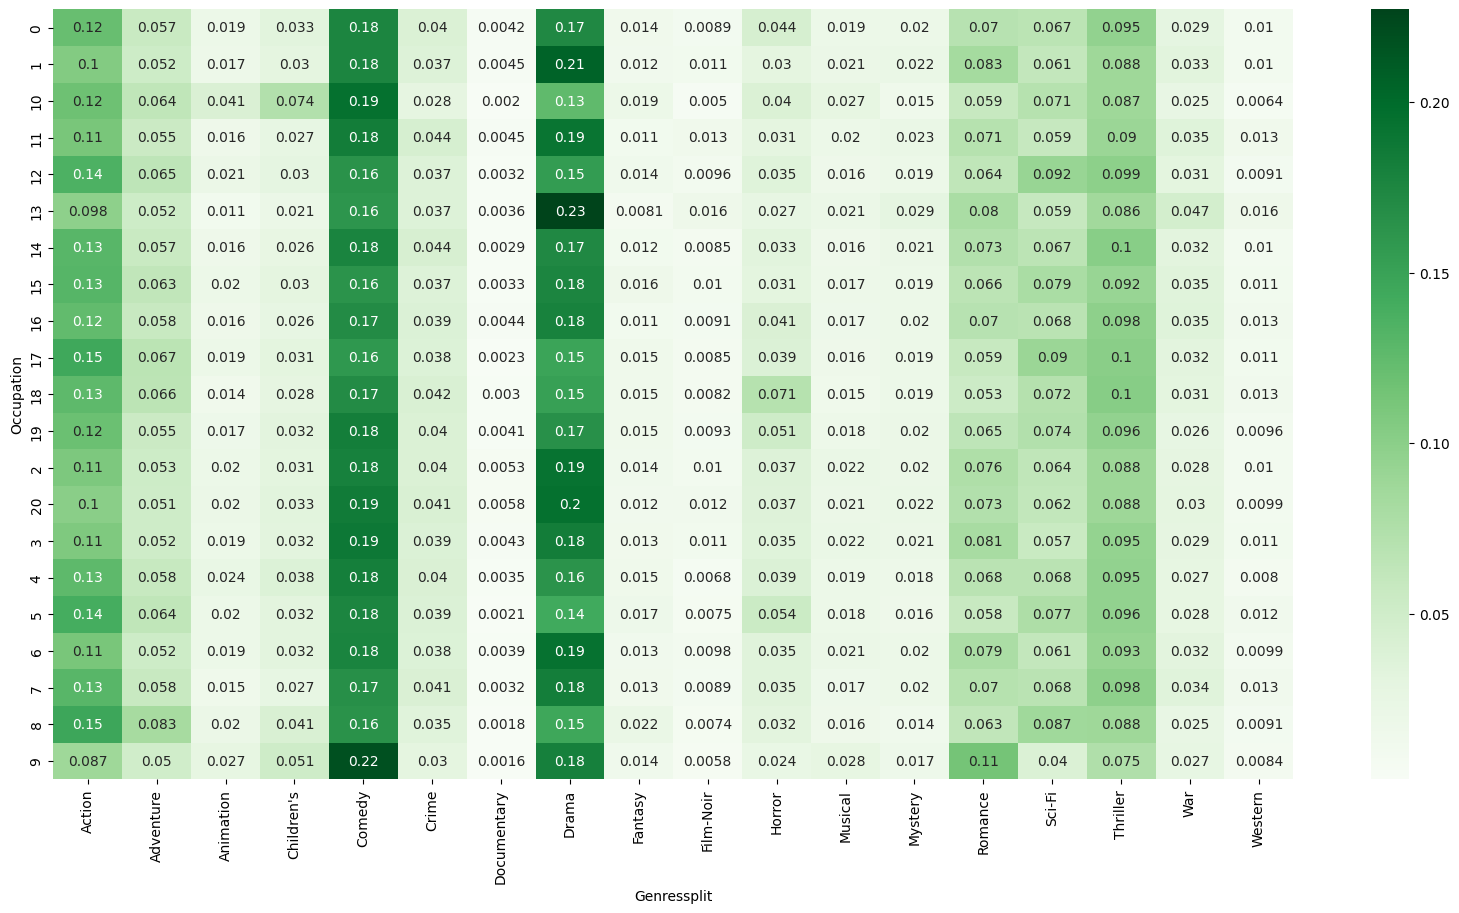

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(data=pd.crosstab(data1["Occupation"], data1["Genressplit"], normalize = "index"),annot=True,cmap = "Greens")

* Comparitively Retired & Homemaker People less preference for Action & have more prefence for Comedy and Drama

<Axes: xlabel='hour', ylabel='Age'>

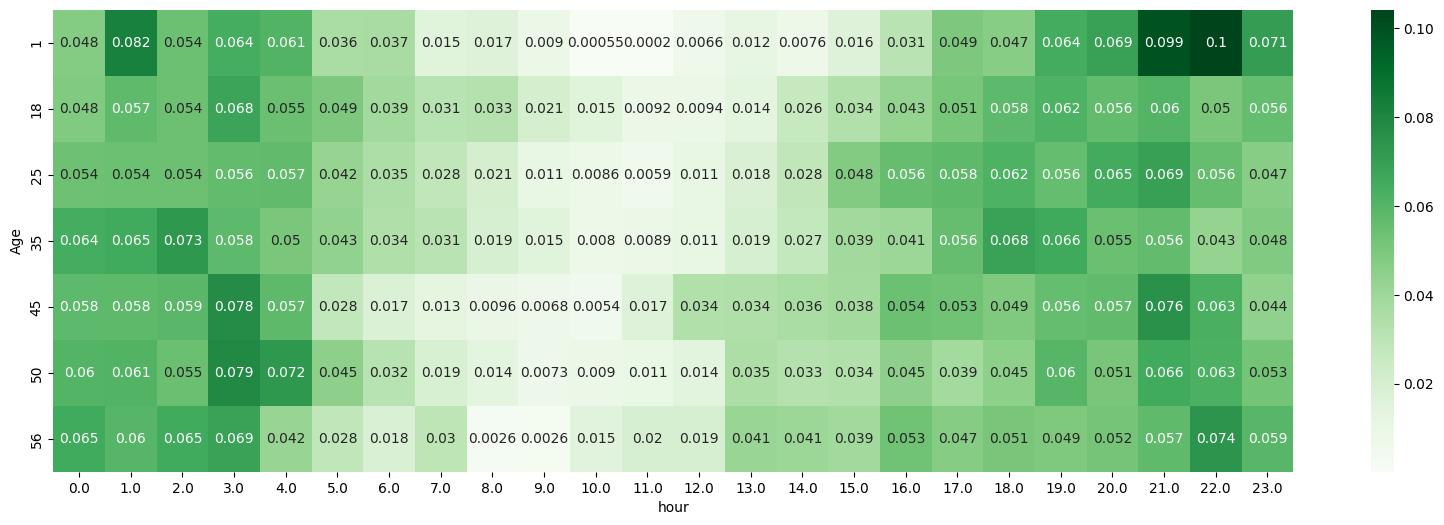

In [ ]:
plt.figure(figsize = (20,6))
sns.heatmap(data=pd.crosstab(data1["Age"], data1["hour"], normalize = "index"),annot=True,cmap = "Greens")

* Compariively 1~18 Age user watch/rate movie in the late night between 21:00 ~ 23:00

In [ ]:
data["Age"].value_counts()

25    783871
35    393419
18    366971
45    163911
50    141588
56     74529
1      54270
Name: Age, dtype: int64

* Most of the Movie Rating are given by 25 ~ 34 Age Group

In [ ]:
data["Occupation"].value_counts()[:5]

4     260352
0     257151
7     208797
1     165346
17    150331
Name: Occupation, dtype: int64

* Occupation:"college/grad student"  have rated most Movies, next most rated are others ,executive/managerial,academic/educator,technician/engineer

In [ ]:
data["Gender"].value_counts()

M    1501710
F     476849
Name: Gender, dtype: int64

* Nearly 80% of ratings are done by Males

In [ ]:
data["Title"].value_counts()[:5]

Men in Black                   10152
Princess Bride, The             9272
L.A. Confidential               9152
E.T. the Extra-Terrestrial      9076
Alien                           8096
Name: Title, dtype: int64

* Men in Black (1997) is most no. of times rated movie

## Selecting 1000 Most Rated Movies & 1000 Most Watched users

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6174 entries, 0 to 3882
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Movie ID           6174 non-null   object  
 1   Title              6174 non-null   object  
 2   Genres             6174 non-null   category
 3   Genressplit        6174 non-null   object  
 4   Releaseyear        6174 non-null   int64   
 5   Releaseyeargroups  6171 non-null   category
dtypes: category(2), int64(1), object(3)
memory usage: 269.9+ KB


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   USerID      6040 non-null   object  
 1   Gender      6040 non-null   category
 2   Age         6040 non-null   category
 3   Occupation  6040 non-null   category
 4   Zipcode     6040 non-null   category
dtypes: category(4), object(1)
memory usage: 233.9+ KB


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   USerID     1000209 non-null  object
 1   Movie ID   1000209 non-null  object
 2   Rating     1000209 non-null  int64 
 3   Timestamp  1000209 non-null  int64 
 4   hour       1000209 non-null  int64 
 5   dayofweek  1000209 non-null  int64 
 6   month      1000209 non-null  int64 
 7   year       1000209 non-null  int64 
 8   day        1000209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 68.7+ MB


In [ ]:
select_movies = ratings['Movie ID'].value_counts()[:1000].index.to_list()

In [ ]:
movies = movies.loc[movies["Movie ID"].isin(select_movies)]
movies.shape

(2024, 6)

In [ ]:
select_users = ratings['USerID'].value_counts()[:1000].index.to_list()

In [ ]:
users = users.loc[users["USerID"].isin(select_users)]
users.shape

(1000, 5)

## Item-Item Similarity Matrix

Lets Create a Matrix for Item[Movie]

In [ ]:
movies.columns

Index(['Movie ID', 'Title', 'Genres', 'Genressplit', 'Releaseyear',
       'Releaseyeargroups'],
      dtype='object')

In [ ]:
item_item = movies[['Movie ID','Releaseyear']].drop_duplicates()

In [ ]:
item_item.head()

,Movie ID,Releaseyear
0,1,1995
1,2,1995
2,3,1995
5,6,1995
6,7,1995


In [ ]:
item_item.shape

(976, 2)

### Adding Average Rating of an Item

In [ ]:
item_item = item_item.merge(data.groupby('Movie ID').Rating.mean().reset_index(), on='Movie ID', how = "left")

In [ ]:
item_item.head()

,Movie ID,Releaseyear,Rating
0,1,1995,4.146846
1,2,1995,3.201141
2,3,1995,3.016736
3,6,1995,3.878723
4,7,1995,3.410480


### Adding Genre By doing sort of OHE

In [ ]:
m = movies.pivot(index='Movie ID', columns='Genressplit', values='Title')
m = ~m.isna()
m = m.astype(int)

In [ ]:
m.head()

Genressplit,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Movie ID,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1020,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1022,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1027,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
item_item = item_item.merge(m, on='Movie ID', how = "left")

### Adding Gender wise Ratings for an item

In [ ]:
item_item = item_item.merge(
    data.groupby(['Movie ID', 'Gender'])['Rating'].mean().
    reset_index().pivot(index='Movie ID', columns='Gender', values='Rating').
    reset_index(), on='Movie ID', how = "left")

In [ ]:
item_item.head()

,Movie ID,Releaseyear,Rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,1,1995,4.146846,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,4.187817,4.130552
1,2,1995,3.201141,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,3.278409,3.175238
2,3,1995,3.016736,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,3.073529,2.994152
3,6,1995,3.878723,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,3.682171,3.909988
4,7,1995,3.410480,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,3.588235,3.267717


In [ ]:
data.columns

Index(['USerID', 'Movie ID', 'Rating', 'Timestamp', 'hour', 'dayofweek',
       'month', 'year', 'day', 'Gender', 'Age', 'Occupation', 'Title',
       'Genres', 'Releaseyeargroups', 'Releaseyear'],
      dtype='object')

### Adding Age wise Ratings for an item

In [ ]:
item_item = item_item.merge(
    data.groupby(['Movie ID', 'Age'])['Rating'].mean().
    reset_index().pivot(index='Movie ID', columns='Age', values='Rating').
    reset_index(), on='Movie ID', how = "left")

### Adding Occupation wise Ratings for an item

In [ ]:
item_item = item_item.merge(
    data.groupby(['Movie ID', 'Occupation'])['Rating'].mean().
    reset_index().pivot(index='Movie ID', columns='Occupation', values='Rating').
    reset_index(), on='Movie ID', how = "left")

In [ ]:
item_item.shape

(976, 51)

### Final item_item Matrix

In [ ]:
item_item.shape

(976, 51)

In [ ]:
item_item.columns

Index(['Movie ID', 'Releaseyear', 'Rating', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'F', 'M', '1_x', '18_x', '25', '35', '45',
       '50', '56', '0', '1_y', '10', '11', '12', '13', '14', '15', '16', '17',
       '18_y', '19', '2', '20', '3', '4', '5', '6', '7', '8', '9'],
      dtype='object')

In [ ]:
item_item =item_item.set_index("Movie ID")

In [ ]:
item_item.fillna(0, inplace=True)

In [ ]:
item_item.head(10)

,Releaseyear,Rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,19,2,20,3,4,5,6,7,8,9
Movie ID,,,,,,,,,,,,,,,,,,,,,
1,1995,4.146846,0,0,1,1,1,0,0,0,...,3.960000,4.000000,4.046296,4.492537,4.040404,4.025641,4.394737,4.189055,4.500000,4.028571
2,1995,3.201141,0,1,0,1,0,0,0,0,...,3.100000,2.970588,3.071429,3.285714,3.116505,3.400000,3.107143,3.115942,2.666667,3.500000
3,1995,3.016736,0,0,0,0,1,0,0,0,...,3.333333,2.777778,2.789474,2.909091,3.060606,2.750000,2.714286,3.045455,3.000000,2.875000
6,1995,3.878723,1,0,0,0,0,1,0,0,...,4.000000,3.853659,3.368421,3.625000,4.034965,3.909091,4.068966,3.923810,4.000000,4.500000
7,1995,3.410480,0,0,0,0,1,0,0,0,...,2.625000,3.208333,3.090909,3.200000,3.500000,3.571429,3.214286,3.183673,3.000000,4.250000
10,1995,3.540541,1,1,0,0,0,0,0,0,...,2.777778,3.694444,3.222222,3.608696,3.633333,3.300000,3.720000,3.597938,3.250000,3.100000
11,1995,3.793804,0,0,0,0,1,0,0,1,...,3.272727,3.595745,3.340426,3.833333,3.771654,4.187500,3.830189,3.832000,4.333333,4.142857
16,1995,3.793255,0,0,0,0,0,0,0,1,...,3.272727,3.642857,3.500000,3.791667,3.870000,4.000000,3.920000,3.896104,3.000000,4.000000
17,1995,4.027545,0,0,0,0,0,0,0,1,...,3.600000,3.894737,4.033333,4.000000,4.020619,4.142857,4.128205,4.045455,5.000000,4.413793


In [ ]:
scaler = MinMaxScaler()
item_item_scaled = pd.DataFrame(scaler.fit_transform(item_item), columns=item_item.columns, index=item_item.index)
item_item_scaled.head()

,Releaseyear,Rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,19,2,20,3,4,5,6,7,8,9
Movie ID,,,,,,,,,,,,,,,,,,,,,
1,0.932432,0.861485,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.740000,0.779528,0.836279,0.927919,0.799284,0.805128,0.905427,0.835363,0.900000,0.805714
2,0.932432,0.540193,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.525000,0.467462,0.562667,0.553710,0.510963,0.680000,0.520807,0.474001,0.533333,0.700000
3,0.932432,0.477544,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.583333,0.409011,0.483532,0.436927,0.493519,0.550000,0.403455,0.450265,0.600000,0.575000
6,0.932432,0.770394,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.750000,0.735164,0.646023,0.658915,0.797586,0.781818,0.808115,0.746044,0.800000,0.900000
7,0.932432,0.611314,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.406250,0.539534,0.568135,0.527132,0.630640,0.714286,0.552812,0.496809,0.600000,0.850000


In [ ]:
item_item_scaled.describe()

,Releaseyear,Rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,19,2,20,3,4,5,6,7,8,9
count,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,...,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000
mean,0.820586,0.672058,0.258197,0.120902,0.047131,0.065574,0.360656,0.081967,0.003074,0.345287,...,0.622864,0.638744,0.671916,0.667072,0.660315,0.722198,0.682662,0.628470,0.615914,0.707783
std,0.190585,0.164587,0.437867,0.326180,0.212028,0.247662,0.480437,0.274455,0.055385,0.475705,...,0.154254,0.163153,0.168326,0.158669,0.163399,0.103294,0.158749,0.169337,0.302642,0.145646
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.756757,0.564949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.531250,0.537008,0.561331,0.574327,0.555342,0.660000,0.588373,0.521959,0.562500,0.643333
50%,0.891892,0.697272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.642081,0.655652,0.687342,0.683995,0.679412,0.727273,0.706047,0.655582,0.700000,0.733333
75%,0.959459,0.793257,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.735294,0.757273,0.801331,0.775194,0.786675,0.800000,0.804109,0.749023,0.800000,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## User-User Similarity Matrix`

* Lets Create a Matric for User

In [ ]:
users.columns

Index(['USerID', 'Gender', 'Age', 'Occupation', 'Zipcode'], dtype='object')

In [ ]:
user_user = users[['USerID', 'Gender', 'Age', 'Occupation', 'Zipcode']].drop_duplicates()

In [ ]:
user_user.head()

,USerID,Gender,Age,Occupation,Zipcode
9,10,F,35,1,95370
17,18,F,18,3,95825
21,22,M,18,15,53706
22,23,M,35,0,90049
25,26,M,25,7,23112


### Adding Average Rating of a User

In [ ]:
user_user = user_user.merge(data.groupby('USerID').Rating.mean().reset_index(), on='USerID', how = "left")

### Adding count of Movies rated by a user

In [ ]:
user_user = user_user.merge(data.groupby('USerID').Rating.count().reset_index(), on='USerID', how = "left")

In [ ]:
user_user.columns

Index(['USerID', 'Gender', 'Age', 'Occupation', 'Zipcode', 'Rating_x',
       'Rating_y'],
      dtype='object')

In [ ]:
user_user.rename(columns = {'Rating_x':'Ave.rating','Rating_y':'movie_count'}, inplace = True)

In [ ]:
user_user.columns

Index(['USerID', 'Gender', 'Age', 'Occupation', 'Zipcode', 'Ave.rating',
       'movie_count'],
      dtype='object')

### Adding Average Hour, weekday, day,month for rating for a user

In [ ]:
data.columns

Index(['USerID', 'Movie ID', 'Rating', 'Timestamp', 'hour', 'dayofweek',
       'month', 'year', 'day', 'Gender', 'Age', 'Occupation', 'Title',
       'Genres', 'Releaseyeargroups', 'Releaseyear'],
      dtype='object')

In [ ]:
user_user = user_user.merge(data.groupby('USerID').hour.mean().reset_index(), on='USerID', how = "left")
user_user = user_user.merge(data.groupby('USerID').dayofweek.mean().reset_index(), on='USerID', how = "left")
user_user = user_user.merge(data.groupby('USerID').day.mean().reset_index(), on='USerID', how = "left")
user_user = user_user.merge(data.groupby('USerID').month.mean().reset_index(), on='USerID', how = "left")

### Label Encoding Gender

In [ ]:
le=LabelEncoder()
user_user["Gender"]=le.fit_transform(user_user["Gender"])
user_user["Gender"].value_counts()

1    769
0    231
Name: Gender, dtype: int64

### Target Encoding Occupation and ZipCode

In [ ]:
te=TargetEncoder()
user_user["Occupation"]=te.fit_transform(user_user["Occupation"],user_user["Ave.rating"])
user_user["Zipcode"]=te.fit_transform(user_user["Zipcode"],user_user["Ave.rating"])

In [ ]:
user_user.head()

,USerID,Gender,Age,Occupation,Zipcode,Ave.rating,movie_count,hour,dayofweek,day,month
0,10,0,35,3.428073,3.570591,4.135338,798,7.181704,4.958647,25.969925,8.953634
1,18,0,18,3.555448,3.499044,3.585434,714,5.134454,5.000000,30.000000,12.000000
2,22,1,18,3.556099,3.462524,3.059486,622,3.824759,4.840836,28.225080,10.271704
3,23,1,35,3.447147,3.465551,3.328012,689,17.968070,1.203193,4.432511,1.568940
4,26,1,25,3.523273,3.423584,3.005457,733,5.570259,5.188267,29.991814,11.909959


### Final user_user Matrix

In [ ]:
user_user.shape

(1000, 11)

In [ ]:
user_user.columns

Index(['USerID', 'Gender', 'Age', 'Occupation', 'Zipcode', 'Ave.rating',
       'movie_count', 'hour', 'dayofweek', 'day', 'month'],
      dtype='object')

In [ ]:
user_user =user_user.set_index("USerID")

In [ ]:
item_item.fillna(0, inplace=True)

In [ ]:
scaler1 = MinMaxScaler()
user_user_scaled = pd.DataFrame(scaler1.fit_transform(user_user), columns=user_user.columns, index=user_user.index)
user_user_scaled.head()

,Gender,Age,Occupation,Zipcode,Ave.rating,movie_count,hour,dayofweek,day,month
USerID,,,,,,,,,,
10,0.0,0.618182,0.000000,0.826929,0.827281,0.091762,0.311618,0.826441,0.832331,0.707952
18,0.0,0.309091,0.740129,0.600966,0.601777,0.067136,0.221629,0.833333,0.966667,1.000000
22,1.0,0.309091,0.743912,0.485626,0.386096,0.040164,0.164059,0.806806,0.907503,0.834313
23,1.0,0.618182,0.110832,0.495187,0.496213,0.059807,0.785749,0.200532,0.114417,0.000000
26,1.0,0.436364,0.553172,0.362644,0.363940,0.072706,0.240785,0.864711,0.966394,0.991368


In [ ]:
user_user_scaled.describe()

,Gender,Age,Occupation,Zipcode,Ave.rating,movie_count,hour,dayofweek,day,month
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.769000,0.510291,0.325449,0.560169,0.561051,0.151599,0.511192,0.473969,0.483286,0.675340
std,0.421683,0.192363,0.274928,0.161424,0.171946,0.123670,0.263837,0.274822,0.248956,0.207820
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.436364,0.094396,0.465949,0.462634,0.063544,0.272544,0.271805,0.277934,0.520784
50%,1.000000,0.436364,0.193936,0.564606,0.569379,0.114483,0.534991,0.464743,0.517929,0.638928
75%,1.000000,0.618182,0.553172,0.677380,0.683549,0.206904,0.746302,0.666667,0.658963,0.897754
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## User-Item Interaction Matrix

In [ ]:
ratings.columns

Index(['USerID', 'Movie ID', 'Rating', 'Timestamp', 'hour', 'dayofweek',
       'month', 'year', 'day'],
      dtype='object')

In [ ]:
user_item = ratings.pivot(index = 'USerID',columns ='Movie ID',values = 'Rating' )

In [ ]:
user_item.fillna(0,inplace = True)

In [ ]:
user_item.shape

(6040, 3706)

In [ ]:
user_item.head()

Movie ID,1,10,100,1000,1002,1003,1004,1005,1006,1007,...,99,990,991,992,993,994,996,997,998,999
USerID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Findind No of Ratings
(user_item >0).sum().sum()

1000209

In [ ]:
# Finding Sprsity in User_Item Interaction Matrix

(user_item >0).sum().sum() / (user_item.shape[0]*user_item.shape[1])

0.044683625622312845

* Only 4.46 % of ratings are filled in User_Item Interaction Matrix

# **Pearson Correlation for Item Item Recommendation**

In [ ]:
item_item_scaled.shape

(976, 50)

In [ ]:
item_item_scaled.index

Index(['1', '2', '3', '6', '7', '10', '11', '16', '17', '19',
       ...
       '3863', '3868', '3869', '3893', '3897', '3911', '3916', '3927', '3948',
       '3952'],
      dtype='object', name='Movie ID', length=976)

* Creating a DataFrame for a Query and All Candidates with Peason Correlation

In [ ]:
ranks = []

for query in item_item_scaled.index:
    for candidate in item_item_scaled.index:
        if candidate == query:
            continue
        ranks.append([query, candidate, pearsonr(item_item_scaled.loc[query], item_item_scaled.loc[candidate])[0]])


Pearson_Item_df = pd.DataFrame(ranks, columns=['query', 'candidate', 'Pearson'])
Pearson_Item_df.head()

,query,candidate,Pearson
0,1,2,0.604590
1,1,3,0.664959
2,1,6,0.559148
3,1,7,0.719536
4,1,10,0.482636


In [ ]:
Pearson_Item_df = Pearson_Item_df.merge(movies[['Movie ID', 'Title']], left_on='query', right_on='Movie ID').rename(columns={'Title': 'query_title'}).drop(columns=['Movie ID'])
Pearson_Item_df = Pearson_Item_df.merge(movies[['Movie ID', 'Title']], left_on='candidate', right_on='Movie ID').rename(columns={'Title': 'Rec_candidate_title'}).drop(columns=['Movie ID'])
Pearson_Item_df = Pearson_Item_df.sort_values(by=['query', 'Pearson'], ascending = [True, False])
Pearson_Item_df.drop_duplicates(inplace=True)
Pearson_Item_df.head()

,query,candidate,Pearson,query_title,Rec_candidate_title
3442565,1,3114,0.991886,Toy Story,Toy Story 2
2668242,1,2355,0.991738,Toy Story,"Bug's Life, A"
3984409,1,3751,0.983111,Toy Story,Chicken Run
1311869,1,1223,0.923581,Toy Story,"Grand Day Out, A"
1180488,1,1148,0.923447,Toy Story,"Wrong Trousers, The"


In [ ]:
Pearson_Item_df.drop_duplicates(inplace=True)

In [ ]:
Pearson_Item_df.shape

(951600, 5)

In [ ]:
Pearson_Item_df = Pearson_Item_df.sort_values(by=['query', 'Pearson'], ascending = [True, False])

In [ ]:
Pearson_Item_df.head()

,query,candidate,Pearson,query_title,Rec_candidate_title
3442565,1,3114,0.991886,Toy Story,Toy Story 2
2668242,1,2355,0.991738,Toy Story,"Bug's Life, A"
3984409,1,3751,0.983111,Toy Story,Chicken Run
1311869,1,1223,0.923581,Toy Story,"Grand Day Out, A"
1180488,1,1148,0.923447,Toy Story,"Wrong Trousers, The"


## Function for Item-Item Recommendation using Pearson Correaltion Coefficient

In [ ]:
# This function work only if we precalculate all possible pearson correlation values for Item vs Item
# But this is efficient as we have to calcuate Pearson Correlation values only once
# and we can query through below function multiple time

def Item_Rec(data,Movie_ID,k):
  # Data is pearson Correlation Dataframe for all item vs item
  # Movie_ID --> Item for which we are finding simialar movies
  # k --> No of Recommenadions Required
  return (data.loc[data["query"] == Movie_ID])[:k]

In [ ]:
Item_Rec(data = Pearson_Item_df ,Movie_ID = "1",k=5)

,query,candidate,Pearson,query_title,Rec_candidate_title
3442565,1,3114,0.991886,Toy Story,Toy Story 2
2668242,1,2355,0.991738,Toy Story,"Bug's Life, A"
3984409,1,3751,0.983111,Toy Story,Chicken Run
1311869,1,1223,0.923581,Toy Story,"Grand Day Out, A"
1180488,1,1148,0.923447,Toy Story,"Wrong Trousers, The"


In [ ]:
movies[movies["Title"] == "Liar Liar "]["Movie ID"]

1455    1485
Name: Movie ID, dtype: object

In [ ]:
Item_Rec(data = Pearson_Item_df ,Movie_ID = "1485",k=3)

,query,candidate,Pearson,query_title,Rec_candidate_title
492051,1485,441,0.985896,Liar Liar,Dazed and Confused
1753444,1485,1517,0.981324,Liar Liar,Austin Powers: International Man of Mystery
3117903,1485,2759,0.979604,Liar Liar,Dick


# **Cosine Simialrity Matrix for item Recommendation**

In [ ]:
Cosine_Item_Matrix= cosine_similarity(item_item_scaled)

In [ ]:
Cosine_Item_Matrix.shape

(976, 976)

In [ ]:
Cosine_Item_Matrix

array([[1.        , 0.87006646, 0.88116146, ..., 0.84282108, 0.90654986,
        0.82580961],
       [0.87006646, 1.        , 0.77969586, ..., 0.84228991, 0.82098621,
        0.77555389],
       [0.88116146, 0.77969586, 1.        , ..., 0.7742923 , 0.88098996,
        0.76826642],
       ...,
       [0.84282108, 0.84228991, 0.7742923 , ..., 1.        , 0.83453074,
        0.82651856],
       [0.90654986, 0.82098621, 0.88098996, ..., 0.83453074, 1.        ,
        0.88169918],
       [0.82580961, 0.77555389, 0.76826642, ..., 0.82651856, 0.88169918,
        1.        ]])

In [ ]:
Cosine_Item_Mat_df = pd.DataFrame(Cosine_Item_Matrix, index = item_item_scaled.index, columns = item_item_scaled.index )

In [ ]:
Cosine_Item_Mat_df

Movie ID,1,2,3,6,7,10,11,16,17,19,...,3863,3868,3869,3893,3897,3911,3916,3927,3948,3952
Movie ID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.870066,0.881161,0.863783,0.905579,0.836112,0.902030,0.856726,0.876303,0.844698,...,0.825611,0.951386,0.937018,0.894715,0.936804,0.953418,0.860025,0.842821,0.906550,0.825810
2,0.870066,1.000000,0.779696,0.805213,0.805253,0.857140,0.806551,0.816625,0.818021,0.734305,...,0.796189,0.848157,0.836826,0.793096,0.834635,0.849304,0.820522,0.842290,0.820986,0.775554
3,0.881161,0.779696,1.000000,0.813927,0.983843,0.790526,0.949329,0.796574,0.882326,0.880996,...,0.771802,0.924591,0.938131,0.877770,0.898160,0.922586,0.800100,0.774292,0.880990,0.768266
6,0.863783,0.805213,0.813927,1.000000,0.844156,0.936083,0.846084,0.898857,0.865581,0.756206,...,0.871590,0.894587,0.869301,0.892155,0.884865,0.897956,0.850961,0.824869,0.846936,0.862837
7,0.905579,0.805253,0.983843,0.844156,1.000000,0.820446,0.962502,0.836780,0.909549,0.872103,...,0.806187,0.948002,0.949328,0.906529,0.924366,0.944451,0.835908,0.802116,0.910420,0.794295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3911,0.953418,0.849304,0.922586,0.897956,0.944451,0.867288,0.939398,0.889948,0.910967,0.896029,...,0.848359,0.990592,0.980210,0.929954,0.972405,1.000000,0.885320,0.867956,0.939537,0.853665
3916,0.860025,0.820522,0.800100,0.850961,0.835908,0.843586,0.906543,0.947713,0.906447,0.734827,...,0.839612,0.890384,0.849674,0.876370,0.939827,0.885320,1.000000,0.836448,0.928057,0.944069
3927,0.842821,0.842290,0.774292,0.824869,0.802116,0.866246,0.812453,0.829250,0.864123,0.712889,...,0.856874,0.869017,0.827917,0.813153,0.860942,0.867956,0.836448,1.000000,0.834531,0.826519


### Function for Item Recommendation

In [ ]:
# This function work only if we precalculate Cosine matrix for Item vs Item
# But this is efficient as we have to calcuate Cosine Matric values only once
# and we can query through below function multiple time

def Item_Rec_cosine(data,Movie_ID,k):
  # Data is pearson Correlation Dataframe for all item vs item
  # Movie_ID --> Item for which we are finding simialar movies
  # k --> No of Recommenadions Required
  iloc_indices = np.argsort(data.loc[Movie_ID,:].values)[::-1]
  return data.index[iloc_indices][1:k+1]

In [ ]:
Item_Rec_cosine(Cosine_Item_Mat_df,"1",5)

Index(['3114', '2355', '3751', '1148', '1223'], dtype='object', name='Movie ID')

In [ ]:
movies1= movies.drop(["Genressplit"], axis=1).drop_duplicates()

In [ ]:
movies1[movies1["Movie ID"].isin(Item_Rec_cosine(Cosine_Item_Mat_df,"1",5))]

,Movie ID,Title,Genres,Releaseyear,Releaseyeargroups
1132,1148,"Wrong Trousers, The",Animation|Comedy,1993,5
1205,1223,"Grand Day Out, A",Animation|Comedy,1992,5
2286,2355,"Bug's Life, A",Animation|Children's|Comedy,1998,5
3045,3114,Toy Story 2,Animation|Children's|Comedy,1999,5
3682,3751,Chicken Run,Animation|Children's|Comedy,2000,5


* We can see that above recommendations are similar to Movie_ID "1"

* Movies recommended of Movie_ID "1" are exactly same what was observed inPeason Correlation Method [3114,2355,3751,1148,1223]

In [ ]:
# Checking Simialar Movies for "Liar Liar" - Movie_ID : 1485
movies1[movies1["Movie ID"].isin(Item_Rec_cosine(Cosine_Item_Mat_df,"1485",5))]

,Movie ID,Title,Genres,Releaseyear,Releaseyeargroups
139,141,"Birdcage, The",Comedy,1996,5
437,441,Dazed and Confused,Comedy,1993,5
1155,1171,Bob Roberts,Comedy,1992,5
1482,1517,Austin Powers: International Man of Mystery,Comedy,1997,5
2690,2759,Dick,Comedy,1999,5


# **Cosine Similarity Matrix for Similar User Recommendation**

In [ ]:
Cosine_User_Matrix= cosine_similarity(user_user_scaled)

In [ ]:
Cosine_User_Matrix.shape

(1000, 1000)

In [ ]:
Cosine_User_Matrix

array([[1.        , 0.89519699, 0.75665161, ..., 0.71989674, 0.81829577,
        0.65972244],
       [0.89519699, 1.        , 0.86142648, ..., 0.60438336, 0.87533041,
        0.75412339],
       [0.75665161, 0.86142648, 1.        , ..., 0.76970319, 0.75548841,
        0.89926712],
       ...,
       [0.71989674, 0.60438336, 0.76970319, ..., 1.        , 0.70726427,
        0.79418284],
       [0.81829577, 0.87533041, 0.75548841, ..., 0.70726427, 1.        ,
        0.78261326],
       [0.65972244, 0.75412339, 0.89926712, ..., 0.79418284, 0.78261326,
        1.        ]])

In [ ]:
Cosine_User_Mat_df = pd.DataFrame(Cosine_User_Matrix, index = user_user_scaled.index, columns = user_user_scaled.index )

In [ ]:
Cosine_User_Mat_df

USerID,10,18,22,23,26,33,36,45,48,53,...,5972,5978,5996,6000,6002,6007,6010,6016,6036,6040
USerID,,,,,,,,,,,,,,,,,,,,,
10,1.000000,0.895197,0.756652,0.553219,0.768487,0.728542,0.834231,0.901144,0.792549,0.852962,...,0.902982,0.783239,0.888107,0.753340,0.816872,0.664578,0.793259,0.719897,0.818296,0.659722
18,0.895197,1.000000,0.861426,0.431495,0.860889,0.739296,0.881037,0.932471,0.820832,0.824501,...,0.786923,0.692386,0.795704,0.757997,0.715574,0.673205,0.695773,0.604383,0.875330,0.754123
22,0.756652,0.861426,1.000000,0.655572,0.991216,0.870173,0.961088,0.808064,0.953526,0.909001,...,0.647162,0.876034,0.660005,0.914364,0.850119,0.826797,0.832848,0.769703,0.755488,0.899267
23,0.553219,0.431495,0.655572,1.000000,0.648226,0.904932,0.753381,0.494801,0.694357,0.742662,...,0.700219,0.869431,0.692031,0.808331,0.821118,0.897099,0.922009,0.891348,0.539521,0.827917
26,0.768487,0.860889,0.991216,0.648226,1.000000,0.868386,0.945340,0.836442,0.967750,0.904870,...,0.658124,0.892831,0.661697,0.901965,0.842812,0.826085,0.825871,0.789353,0.737641,0.868976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,0.664578,0.673205,0.826797,0.897099,0.826085,0.966766,0.872295,0.707559,0.829235,0.820005,...,0.771775,0.906207,0.796251,0.909949,0.789386,1.000000,0.943428,0.924932,0.752875,0.931418
6010,0.793259,0.695773,0.832848,0.922009,0.825871,0.947242,0.911460,0.720502,0.856693,0.904323,...,0.840428,0.959548,0.841199,0.917993,0.910751,0.943428,1.000000,0.938525,0.734133,0.895360
6016,0.719897,0.604383,0.769703,0.891348,0.789353,0.896161,0.814121,0.681494,0.863014,0.847061,...,0.782614,0.957173,0.808057,0.882029,0.817658,0.924932,0.938525,1.000000,0.707264,0.794183


### Function for Similar User Recommendation

In [ ]:
# This function work only if we precalculate Cosine matrix for User vs User
# But this is efficient as we have to calcuate Cosine Matric values only once
# and we can query through below function multiple time

def User_Rec_cosine(data,User_ID,k):
  # Data is pearson Correlation Dataframe for all User vs User
  # User_ID --> User for which we are finding simialar Users
  # k --> No of Recommenadions Required
  iloc_indices = np.argsort(data.loc[User_ID,:].values)[::-1]
  return data.index[iloc_indices][1:k+1]

In [ ]:
User_Rec_cosine(Cosine_User_Mat_df,"10",5)

Index(['151', '5271', '919', '1701', '1164'], dtype='object', name='USerID')

In [ ]:
users.columns

Index(['USerID', 'Gender', 'Age', 'Occupation', 'Zipcode'], dtype='object')

In [ ]:
users[users["USerID"].isin(User_Rec_cosine(Cosine_User_Mat_df,"10",5))]

,USerID,Gender,Age,Occupation,Zipcode
150,151,F,25,20,85013
918,919,F,35,1,92056
1163,1164,F,25,19,90020
1700,1701,F,25,4,97233
5270,5271,F,25,0,94110


* We can see that above recommendations are similar to User_ID "10"

# **Nearest Neighbours Algorithm for Item Recommendation with Cosine Metric**

In [ ]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')

In [ ]:
model_knn.fit(item_item_scaled)

NearestNeighbors(algorithm='brute', metric='cosine')

* Now we will find 5 Nearest Neighbour for Movie_ID = 1

In [ ]:
# k in the Movie_ID
k = "1"
distances, indices = model_knn.kneighbors(item_item_scaled.loc[k,:].values.reshape(1, -1), n_neighbors = 6)

In [ ]:
distances

array([[0.        , 0.00248231, 0.00257019, 0.00528172, 0.02423075,
        0.02435134]])

In [ ]:
indices

array([[  0, 806, 602, 950, 266, 295]])

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(item_item_scaled.index[i]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, item_item_scaled.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 1:

1: 3114, with distance of 0.00248231289646883:
2: 2355, with distance of 0.0025701919525846773:
3: 3751, with distance of 0.005281715411900256:
4: 1148, with distance of 0.024230750204634388:
5: 1223, with distance of 0.024351342474249527:


* Nearest Neight Algorithm also Recommended same Movies fr Movie_ID "1" simialr to Pearson Correlation and Cosine simialrity

In [ ]:
# k in the Movie_ID
# Checking Simialar Movies for "Liar Liar" - Movie_ID : 1485
k = "1485"
distances, indices = model_knn.kneighbors(item_item_scaled.loc[k,:].values.reshape(1, -1), n_neighbors = 6)
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(item_item_scaled.index[i]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, item_item_scaled.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 1:

1: 441, with distance of 0.005334599396921047:
2: 1517, with distance of 0.007079118083948566:
3: 2759, with distance of 0.007760380205664719:
4: 141, with distance of 0.01000774462089804:
5: 1171, with distance of 0.010126389346876263:


# **Matrix Factorization with k(Embeddings)= 4**

In [ ]:
ratings.columns

Index(['USerID', 'Movie ID', 'Rating', 'Timestamp', 'hour', 'dayofweek',
       'month', 'year', 'day'],
      dtype='object')

In [ ]:
user_item1 = ratings[['USerID', 'Movie ID', 'Rating']]

In [ ]:
user_item1['USerID'].nunique()

6040

In [ ]:
user_item1['Movie ID'].nunique()

3706

In [ ]:
user_item1.shape

(1000209, 3)

In [ ]:
#  Changing columns as per library requirement
user_item1.columns = ['UserId', 'ItemId', 'Rating']

In [ ]:
user_item1.head()

,UserId,ItemId,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [ ]:
model = CMF(method="als", k=4, lambda_=0.1, user_bias=True, item_bias=True, verbose=False)
model.fit(user_item1)

Collective matrix factorization model
(explicit-feedback variant)


In [ ]:
model.A_.shape

(6040, 4)

In [ ]:
model.B_.shape

(3706, 4)

In [ ]:
# Finding Predicted Rating for all Interactions
np.dot(model.A_, model.B_.T)

array([[-0.22948895, -0.38242546,  0.07186198, ..., -0.16327427,
        -0.23036666,  0.04428816],
       [-0.36907816, -0.37764624,  0.47913522, ..., -0.05196466,
        -0.10314548,  0.02455359],
       [-0.47322673, -0.36404192, -0.20490578, ..., -0.22136272,
        -0.20130685, -0.00387301],
       ...,
       [-0.99852836, -0.12333941,  0.15010752, ..., -0.00315326,
         0.20635262, -0.13794099],
       [-0.11629342,  0.00380674,  0.1834784 , ...,  0.04070282,
         0.02041265, -0.01076825],
       [ 0.36193278,  0.56550443, -0.00564478, ...,  0.23328021,
         0.19428274, -0.0382481 ]], dtype=float32)

In [ ]:
# Final Predicted Rating matrix  [dot(User, Item)+ user Bias + Item bias + Global Rating Mean]
user_item_pred = np.dot(model.A_, model.B_.T) + model.user_bias_.reshape(-1, 1)+ model.item_bias_.reshape(1, -1) + model.glob_mean_

In [ ]:
user_item_pred = pd.DataFrame(user_item_pred, columns = user_item.columns, index = user_item.index)

In [ ]:
user_item_pred

Movie ID,1,10,100,1000,1002,1003,1004,1005,1006,1007,...,99,990,991,992,993,994,996,997,998,999
USerID,,,,,,,,,,,,,,,,,,,,,
1,4.333495,3.188670,4.219245,4.184110,3.803981,4.290605,4.594391,4.422247,4.590399,4.315201,...,3.534152,4.313815,4.035079,3.595278,3.862863,4.864362,3.105049,1.412619,4.176008,4.017798
10,3.969983,2.969526,4.402596,4.185825,3.709589,4.065962,4.367632,4.136885,4.570137,4.346762,...,3.288252,4.159964,3.848906,3.367805,3.637520,4.320831,2.851356,1.300005,4.079306,3.774141
100,4.128202,3.245499,3.980923,4.167925,3.631841,4.364059,3.930409,4.118989,3.828007,4.023709,...,3.375077,4.982054,4.058735,3.615774,3.917556,4.154002,3.176496,1.392975,4.243513,4.008082
1000,4.808551,3.847477,4.297471,3.459938,4.111794,4.249291,4.312610,4.487895,4.468925,4.805585,...,3.084459,4.512967,3.810835,3.274061,3.515534,3.189830,2.636032,1.623991,4.318335,3.679024
1001,3.997905,3.117397,3.031715,2.593992,2.945951,3.552661,2.987324,3.546302,3.117285,3.520792,...,2.378847,4.075969,3.091537,2.632554,2.911162,2.812785,2.125735,0.751135,3.389384,3.039845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.446848,3.490171,3.820152,3.310775,3.719384,4.062055,3.911000,4.156456,3.901362,4.274743,...,2.900009,4.479270,3.629959,3.125385,3.383956,3.147267,2.544312,1.304223,4.050930,3.527829
996,4.192039,3.149032,3.812319,3.518573,3.619547,3.980602,4.058711,4.085215,3.972115,4.122580,...,2.961611,4.265916,3.618758,3.130378,3.389986,3.557965,2.571515,1.164302,3.960178,3.537775
997,3.868599,3.751900,4.601635,4.674826,3.927784,4.753085,2.981449,3.752574,3.081795,4.365089,...,3.209965,6.621392,4.388346,3.836277,4.195067,2.140124,3.397312,1.876884,4.916871,4.139713


In [ ]:
user_item_pred.loc["1000"]["1"]

4.808551

In [ ]:
user_item.loc["1000"]["1"]

5.0

### MAPE Metric

In [ ]:
user_item.values[user_item > 0]

array([5., 5., 5., ..., 2., 2., 2.])

In [ ]:
user_item_pred.values[user_item > 0]

array([4.333495 , 4.4208403, 3.5126076, ..., 0.2085023, 2.641737 ,
       2.3006194], dtype=float32)

In [ ]:
mape(user_item.values[user_item > 0],user_item_pred.values[user_item > 0] )

0.427507060167678

### MSE

In [ ]:
mse(user_item.values[user_item > 0],user_item_pred.values[user_item > 0] )

2.235840644716731

In [ ]:
(mse(user_item.values[user_item > 0],user_item_pred.values[user_item > 0]))**0.5

1.4952727659917875

### MAE

In [ ]:
mae(user_item.values[user_item > 0],user_item_pred.values[user_item > 0] )

1.1930984183148428

* Looking at the Error value, we can say that embeddings have to be increased to get better results
* Lets do Hyperparameter Tuning for No of Embeddings

In [ ]:
MAE = []
for i in range(2,16):
  model = CMF(method="als", k=i, lambda_=0.1, user_bias=True, item_bias=True, verbose=False)
  model.fit(user_item1)
  user_item_pred = np.dot(model.A_, model.B_.T) + model.user_bias_.reshape(-1, 1)+ model.item_bias_.reshape(1, -1) + model.glob_mean_
  MAE.append(mae(user_item.values[user_item > 0],user_item_pred[user_item > 0]))

Text(0, 0.5, 'MAE Error')

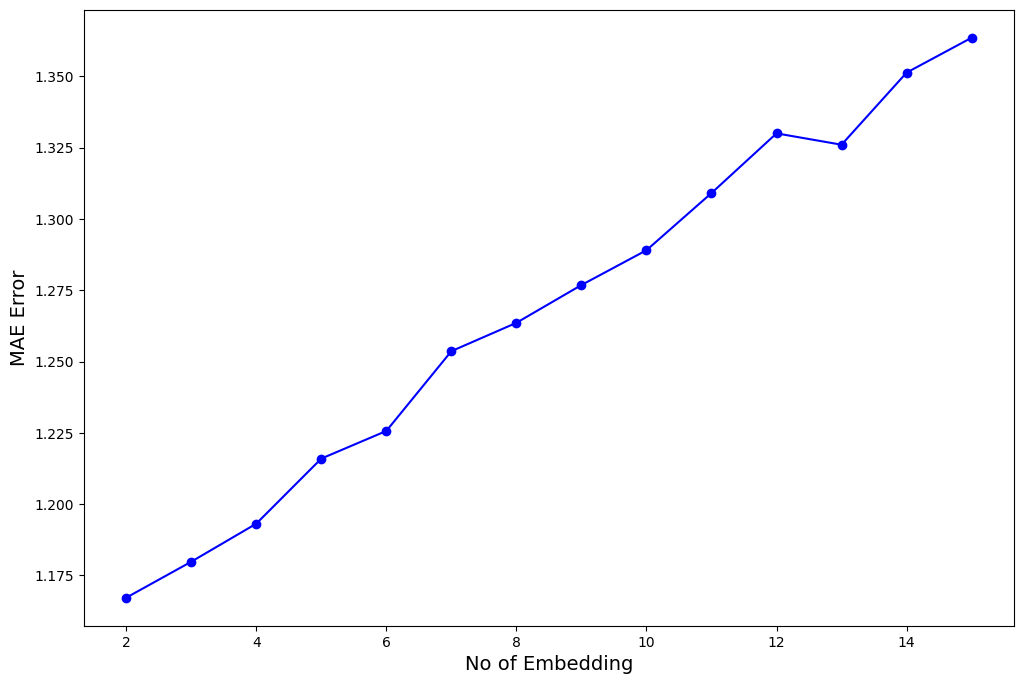

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(2, 16), MAE, "bo-")
plt.xlabel("No of Embedding", fontsize=14)
plt.ylabel("MAE Error", fontsize=14)

* MAE Error is increasing with increase in No of Embeddings
* As Sparsity of the Matrix is very high, we are not getting Better Results
* To get Better Results, we have increase more User-Item Ratings

## Embedding Visualizaton with k=4

In [ ]:
model = CMF(method="als", k=4, lambda_=0.1, user_bias=True, item_bias=True, verbose=False)
model.fit(user_item1)
user_item_pred = np.dot(model.A_, model.B_.T) + model.user_bias_.reshape(-1, 1)+ model.item_bias_.reshape(1, -1) + model.glob_mean_

In [ ]:
# Users
model.A_.shape

(6040, 4)

In [ ]:
# Items
model.B_.shape

(3706, 4)

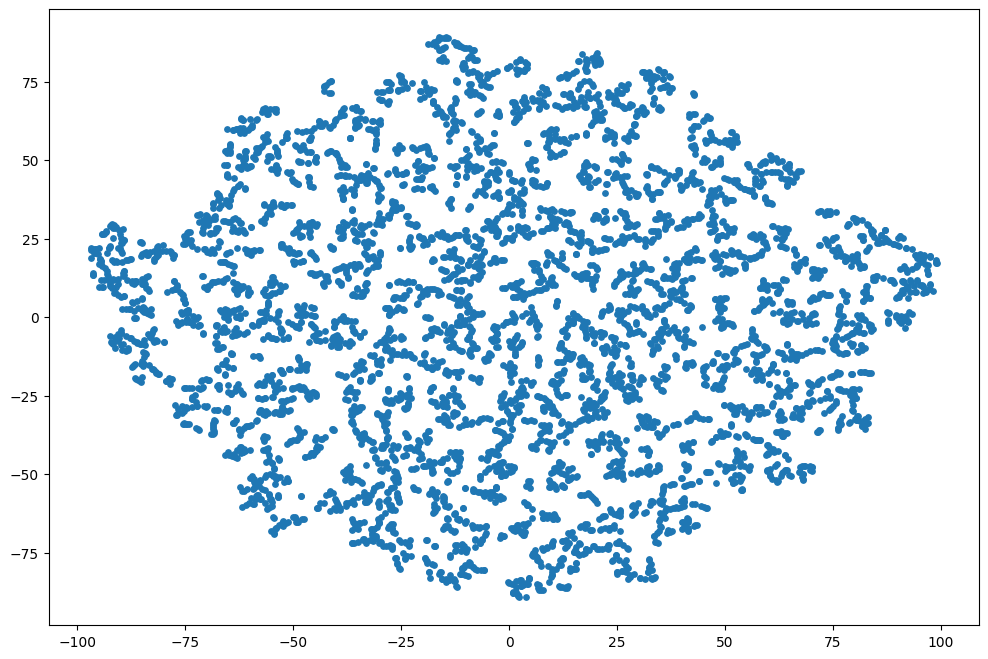

In [ ]:
# User Visualization using tSNE
usertsne = TSNE(n_components = 2, perplexity = 15, random_state = 0)
Z = usertsne.fit_transform(model.A_)


fig, ax = plt.subplots(figsize=(12, 8))
im = ax.scatter(Z[:,0],Z[:,1], s=15)

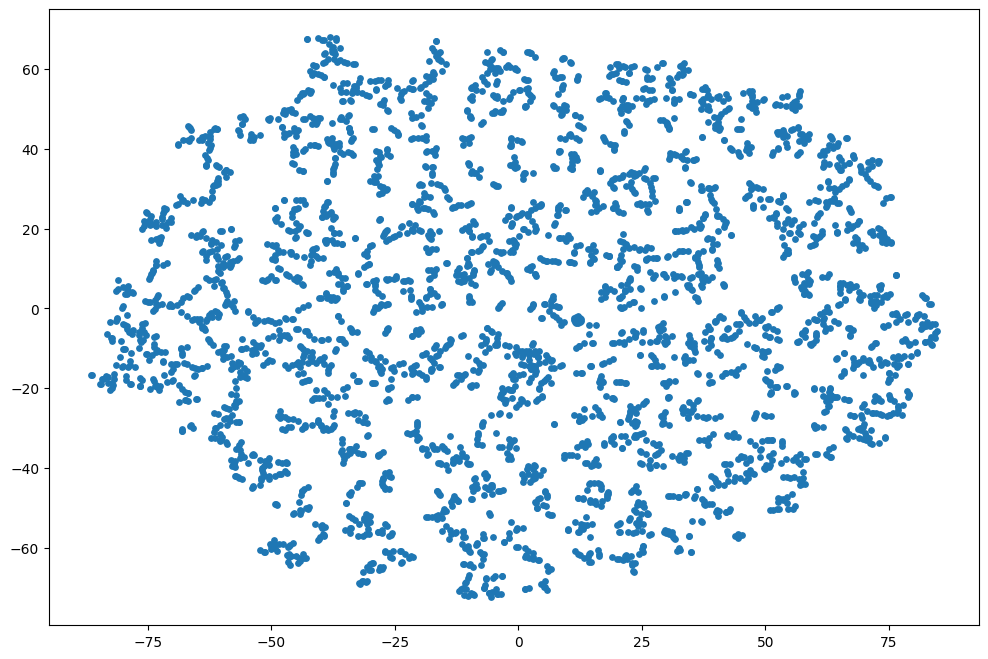

In [ ]:
# Items Visualization using tSNE
itemtsne = TSNE(n_components = 2, perplexity = 15, random_state = 0)
Z = usertsne.fit_transform(model.B_)

fig, ax = plt.subplots(figsize=(12, 8))
im = ax.scatter(Z[:,0],Z[:,1],s=15)

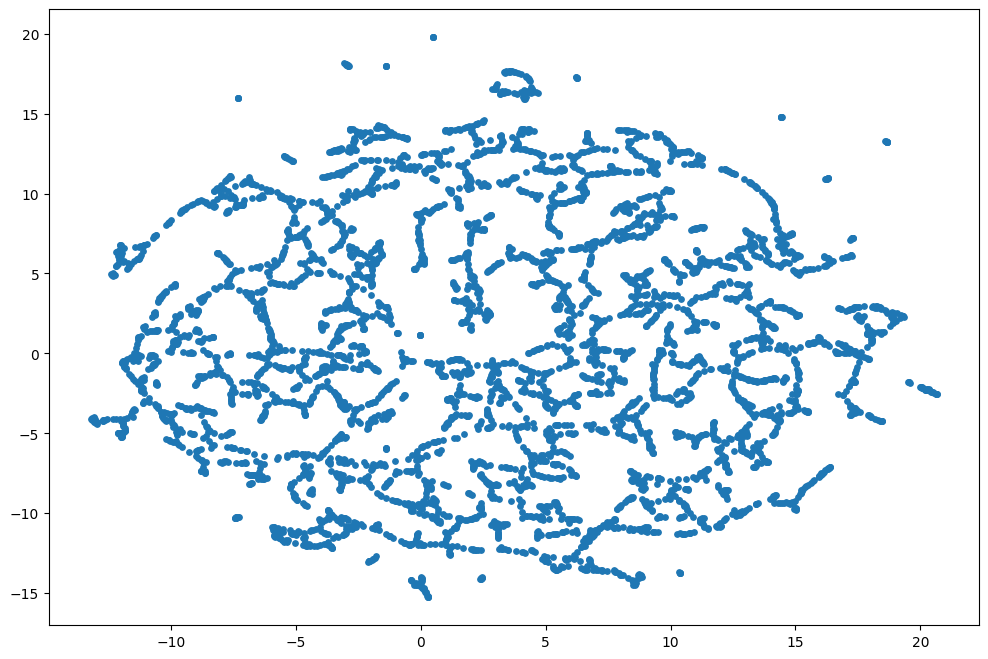

In [ ]:
# Users Visualization using UMAP
userumap = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation')
Z = userumap.fit_transform(model.A_)


fig, ax = plt.subplots(figsize=(12, 8))
im = ax.scatter(Z[:,0],Z[:,1], s=15)

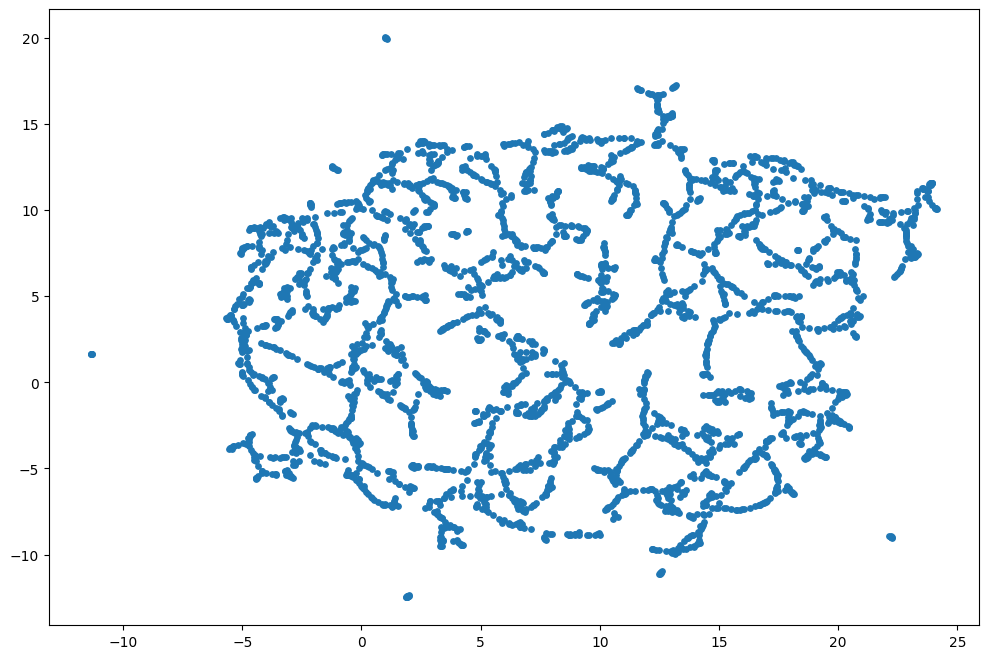

In [ ]:
# Items Visualization using UMAP
itemumap = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation')
Z = itemumap.fit_transform(model.B_)


fig, ax = plt.subplots(figsize=(12, 8))
im = ax.scatter(Z[:,0],Z[:,1], s=15)

* From MF Embdedding Visualization, we are not able to clearly see Clusters but can observe some eccentric Users and Items are present from UMAP

## Similarity for Item using Embeddings

In [ ]:
ItemEmbedding = pd.DataFrame(data=model.B_ , index= user_item.columns)

In [ ]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(ItemEmbedding)
k = "1"
distances, indices = model_knn.kneighbors(ItemEmbedding.loc[k,:].values.reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for Item {0}:\n'.format(ItemEmbedding.index[i]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, ItemEmbedding.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Item 1:

1: 1552, with distance of 0.0018660426139831543:
2: 2944, with distance of 0.0019789934158325195:
3: 1046, with distance of 0.002614915370941162:
4: 2919, with distance of 0.004396259784698486:
5: 1484, with distance of 0.004983425140380859:


* As the Matrix Factorization MAE is high, we can see that Recommended Items are not same as Earlier Cosine Similarity function Recommendations

## Similarity for User using Embeddings

In [ ]:
UserEmbedding = pd.DataFrame(data=model.A_ , index= user_item.index)

In [ ]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(UserEmbedding)
k = "10"
distances, indices = model_knn.kneighbors(UserEmbedding.loc[k,:].values.reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for User {0}:\n'.format(UserEmbedding.index[i]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, UserEmbedding.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for User 1:

1: 1326, with distance of 0.0009621381759643555:
2: 3197, with distance of 0.0028937458992004395:
3: 3137, with distance of 0.0032917261123657227:
4: 12, with distance of 0.0032966136932373047:
5: 3890, with distance of 0.010617494583129883:


* As the Matrix Factorization MAE is high, we can see that Recommended users are not same as Earlier Cosine Similarity function Recommendations

# **Business Insights**

**Movies**

* * No of Unique Movie ID are 3783
* *  No of Unique Title are 3733
* * No of Unique Genres are 296
* * No of Unique Genressplit are 18
* * No of Unique Releaseyear are 81
* * No of Unique Releaseyeargroups are 5

* Most of the Movies are in the Genres
** Drama
** Comedy
** Thriller & Action

* More than 75% of the movies have release year after 1983

* Most of the Movies avaiable are of 90's Decade

**Users**
* * No of Unique USerID are 6040
* * No of Unique Gender are 2
* * No of Unique Age are 7
* * No of Unique Occupation are 21
* * No of Unique Zipcode are 3439

* Majority of the Users occupation
* * college/grad student
* * executive/managerial
* * academic/educator

* Minimum no of users are from below Occupations
* * Farmers
* * tradesman/craftsman
* * homemakers

* 35% of the users are in the Age group "25 ~ 34"
* 20% of the users are in the Age group "35 ~ 44"
* only 4 % of the users are from age group "1~17"
* only 6% fo the users are from group >56

* 72% users are Male Gender only 28% are Female Gender

**Ratings**

* No of Unique USerID Rated Movies are 6040
* No of Unique Movie_ID Rated are 3706
* No of Unique Rating are 5
* No of Unique Timestamp are 458455
* No of Unique hour are 24
* No of Unique dayofweek are 7
* No of Unique month are 12
* No of Unique year are 4
* No of Unique day are 31

* * 35% of the ratings are given as 4
* * only 23% of ratings are given as 5

* * Most of the movies are rated/watched in the Night and midnight
* * Movies are least watched in morning and noon time

* *Comparitively movies are mostly watched in Saturdays and Sunday
* * Least rated/watched on Fridays

* * Most movies are watched /rated in the month of November & next in August
* * leastly watched /rated in the month of March



**Overall all  Data Analysis:**

* Gender has no Bias in Rating Viewpoint for Movies
* Age Groups 18 ~ 25, 25 ~ 34, 35 ~ 44, 45 ~ 49 are comparively critical in rating movies in caomparison with other age groups
* All Age groups have almost preference order for Genres : Drama--> Comedy --> Action --> Thriller
* Female has more preference in Genres - Romance,Comedy,Drame in Comparison with Male
* Male has more preference in Genres - Action,Mystery in
comparsion with Female
* Comparitively Retired & Homemaker People less preference for Action & have more prefence for Comedy and Drama
* Compariively 1~18 Age user watch/rate movie in the late night between 21:00 ~ 23:00
* Occupation:"college/grad student"  have rated most Movies, next most rated are others ,executive/managerial,academic/educator,technician/engineer
* Most of the Movie Rating are given by 25 ~ 34 Age Group
* Nearly 75% of ratings are done by Males
* Men in Black (1997) is most no. of times rated movie

**Item Item Recommendation System:**

* Item-Item Recommendation are similar in all 3 Models
* * Pearson Correlation
* * Cosine Simialrity
* * Nearest Neighbours Approach

**How ever little Variation is Observed in Order of REcommendation May due to Type of Metric Used in 3 Models**
* * Pearson Correlation : Correlation(Variance) Comparison
* * Cosine Simalarity : Direction in N-Dim Hyperspace & Comparison of Difference in Angle
* * Nearest Neighbours : Purely on the Basis of Distance
* So there is slight Difference in Order of Recommendation

For Example Movie_ID : 1, REcommendation Order as below
* * Pearson Correlation : 3114,2355,3751,1223,1148
* * Cosine Simialrity : 1148,1223,2355,3114,3751
* * Nearest Neighbours Approach : 3114, 2355,3751,1148,1223


**User-User Recommendation System:**
* User-User Recommendation using Cosine Simialrity has Given Comparable results when verified with User Data

**Matric Factorization Recommendation System**

* Only 4.46 % of ratings are filled in User_Item Interaction Matrix
* Sparsity is Very High for User-Item Interaction Matrix
* So MAPE [42%], MAE [1.19] Observed... which is very High..Not Reliable
* Even with Increasing the no of Embeddings fomr 2 --> 16, MAE increase from 1.165 --> 1.37
* So Need to improve Sparity for use of Matrix Factorization

**Drawbacks of Matric Factorization Algorithm**
* Predicted rating are not able to get for movies which do not have any Earlier Rating [Kind of Cold Start Problem for Non Rated Movies]
* Need Decent Sparsity to get Relaible Values

**Visualization of MF Embedding**
* From MF Embdedding Visualization, we are not able to clearly see Clusters but can observe some eccentric Users and Items are present from UMAP



# **Recommendations**

* Genres like Thriller, Action Romance can be increased as they are 3~ 5th most watched Movies
* Mostly in this Plaform Content is watched by Students or White Collar Job Users ....less users from Blue Collar users like Farmer & trader Segment....Need to Figure Schemes & Content to increase theit Viewership
* Users Have Less Tendency to watch Movies on Fridays , Even if it is Weekend.. So in order not loose User Focus on Fridays, some Exlusive releases or Rent basis Schemes can be provided to capture user even on Friday
* Inorder to capture Young Age Users, Party Streaming cn alos be provided for capturing Threatre & Together watching Feeling
* Make sure that Each Movie has altleast 1 rating in order not ot loose out in MAtrix Factorization Algorithm

* As the User Base is more,User-User Simialrity can be used to Improve REcommendnation to avoid Cold Start Trouble



# Finding Compressed Sparse Matrix

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

A = csr_matrix([[1, 0],[3, 7]])
print(A)

  (0, 0)	1
  (1, 0)	3
  (1, 1)	7
